In [2]:
import pandas as pd
import numpy as np
import helper_functions as hf
import pickle
import matplotlib.pyplot as plt
from sklearn import preprocessing
import importlib
importlib.reload(hf)
import math
import copy


In [10]:
qual_vec_file = "../data/AG_new/feces/glove_emb_AG_newfilter.07_100.txt"
qual_vecs = pd.read_csv(qual_vec_file, sep = " ", index_col = 0, header=None, dtype = {0:str})

In [93]:
qual_vecs.index.values

array(['TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCTGATACTGGCAAGCTTGAGTCTCGTAGAGGGGGGTA',
       'TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGTGTGGCAAGTCTGATGTGAAAGGCATGGGCTCAACCTGTGGACTGCATTGGAAACTGTCATACTTGAGTGCCGGAGGGGTAAGCG',
       'TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGATGTTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGATATCTTGAGTGCAGTTGAGGCAGGCG',
       ...,
       'TTCCAGCTCCAATAGCGTATATTAAAGTTGTTGCAGTTAAAAAGCTCGTAGTTGGACCTTGGACCTGGACAGGCGGTCCGCCCCACGGCGAGTACTGTCTTGCTGGGTCTTTCCTCTTGGTGATCTGTTGTTTCGGCAGC',
       'TTCCAGCTCCAATAGCGTATATTAAAGTTGTTGCAGTTAAAAAGCTCGTAGTTGGACCTTGGACCTGGACAGGCGGTCCGCCTCACGGCGAGTACTGTCTTGCTGGGTCTTTCCTCTTGGGGATCTGTTGTTTCGGCAGC',
       '<unk>'], dtype=object)

In [34]:
otu_file = "../data/AG_new/feces/seqtab_final_filter.07.txt"
otu = pd.read_csv(otu_file, sep = "\t", index_col= 0)
print("Samples: " + str(otu.shape[0]) + "  Taxa: " + str(otu.shape[1]))


KeyboardInterrupt: 

In [ ]:

mapping_file = "../data/AG_new/AG_mapping.txt"
mapping = pd.read_csv(mapping_file, sep = "\t", index_col=0)

err_qid = pd.read_csv("../data/AG_new/err-to-qid.txt", sep = "\t", index_col = 0)

convert_sample_ids = err_qid.loc[otu.index.values, :]
otu_tmp = otu.set_index(convert_sample_ids.sample_title)


In [ ]:
otu_clean, qual_vecs_clean = hf.match_otu_qual(otu_tmp, qual_vecs)
otu_clean, map_clean = hf.match_otu_map(otu_clean, mapping)

In [ ]:


#number_criteria = ["BMI", "AGE_CORRECTED"]
number_criteria = []
cat_criteria = ["IBD", "EXERCISE_FREQUENCY", "SEX", "ONE_LITER_OF_WATER_A_DAY_FREQUENCY", 
        "SEAFOOD_FREQUENCY", "PROBIOTIC_FREQUENCY", "OLIVE_OIL", "FRUIT_FREQUENCY", 
         "SLEEP_DURATION", "SUGAR_SWEETENED_DRINK_FREQUENCY", "MILK_CHEESE_FREQUENCY",
         "RED_MEAT_FREQUENCY","MEAT_EGGS_FREQUENCY", "VEGETABLE_FREQUENCY", "BODY_SITE"]
otu_clean, map_clean = hf.filterForMetadata(otu_clean, map_clean, number_criteria, cat_criteria)

In [9]:

otu_clean.T.to_csv("../data/AG_new/feces/otu_filter.07_t.csv", sep = ",")
#map_clean.to_csv("../data/AG_new/feces/map_filter.07.csv", sep = ",")

In [21]:
otu_clean.shape
map_clean.shape

(9238, 0)

In [ ]:
#Make train/test set
test_samples_file = "../data/AG_new/feces/test_samples.txt"
with open(test_samples_file) as f:
    test_samples = f.read().split()

err_qid = pd.read_csv("../data/AG_new/err-to-qid.txt", sep = "\t", index_col = 0)
test_samples = err_qid.loc[test_samples, "sample_title"]
test_samples = test_samples[ test_samples == test_samples] #delete Nan values
test_samples = test_samples[[test_samples[i] in otu_clean.index.values for i in range(len(test_samples))]]



In [ ]:
otu_train, otu_test, map_train, map_test = hf.splitTrainTest(otu_clean, map_clean, test_samples)
#map_train = map_train.drop('BODY_SITE', axis = 1)
#map_test = map_test.drop('BODY_SITE', axis = 1)

importlib.reload(hf)
map_train = map_train.drop('BODY_SITE', axis = 1)
map_test = map_test.drop('BODY_SITE', axis = 1)
map_train, map_test = hf.makeMappingNumeric(map_train, map_test, number_criteria, cat_criteria)


In [94]:
filt = ".07"
f = open("../data/AG_new/feces/otu_train_asv_ibd_filter" + str(filt) + ".obj", "wb")
pickle.dump(otu_train, f)
f.close()

f = open("../data/AG_new/feces/otu_test_asv_ibd_filter" + str(filt) + ".obj", "wb")
pickle.dump(otu_test, f)
f.close()

#f = open("../data/AG_new/feces/qual_vecs_asv_ibd_filter" + str(filt) +  ".obj", "wb")
#pickle.dump(qual_vecs, f)
#f.close()

f = open("../data/AG_new/feces/map_train_asv_ibd_filter" + str(filt) + ".obj", "wb")
pickle.dump(map_train, f)
f.close()

f = open("../data/AG_new/feces/map_test_asv_ibd_filter" + str(filt) +  ".obj", "wb")
pickle.dump(map_test, f)
f.close()


In [95]:
otu_train.columns.values

array(['AAAATCCCACGCCAACCAGTTTGGGAATAAATGCAATACGCTCTGCGGCCTGCACATTCATAGAGATTGCGGCAATGCCAAGCGCGCTAAGTAAGGCGATTTTCTTAAAGCGATGAAGTGTCATGAAGATATCCTTTATG',
       'AACAGAGGATGCAAGCGTTATCCGGAATTATTGGGCGTAAAGTGTCTGTAGGTGGCTTTTCAAGTCCCTCGTCAAATACCAGGGCTTAACCCTGGACAGGCGTTGGAAACTACCAAGCTGGAGTGCGGTAGGGGCAGAGG',
       'AACAGAGGATGCAAGCGTTATCCGGAATTATTGGGCGTAAAGTGTCTGTAGGTGGCTTTTCAAGTCCGTCGTCAAATCCCAGGGCTCAACCCTGGACAGGCGGTGGAAACTACCAAGCTAGAGTACGGTAGAGGCAGAGG',
       ...,
       'TTTTGTATTTTTAGTAGAGATGGGGTTTCTCCATGTTGGTCAGGCTGGTCTCGAACTCCCGACCTCAGATGAGCCTTGGCCTCCCAAAGTGCTGGGACTACAGGCGTGAGCCACCGCGCCCAGCCCCTAATACTTTCAAA',
       'TTTTTGTATTTTTAGTAGAGACGGGGTTTCACCATGTTAGTCAGGCTGGTCTTGACCTCTTGACCTCATGATCCACCCGCCTTGGCCTCCCAAAGTGCTGGAATTACAAGTGTGAGCCACCACTCCCAGCTAAATATAAT',
       'TTTTTGTATTTTTAGTAGAGACGGGGTTTCACCATGTTGGTCAGGCTGGTCTTGACCTCTTGACCTCATGATCCACCCGCCTTGGCCTCCCAAAGTGCTGGAATTACAAGTGTGAGCCACCACTCCCAGCTAAATATAAT'],
      dtype=object)

In [3]:
filt = ".07"
f = open("../data/AG_new/feces/otu_train_asv_ibd_filter" + str(filt) + ".obj", "rb")
otu_train = pickle.load(f)
f.close()

f = open("../data/AG_new/feces/otu_test_asv_ibd_filter" + str(filt) + ".obj", "rb")
otu_test = pickle.load(f)
f.close()

f = open("../data/AG_new/feces/map_train_asv_ibd_filter" + str(filt) + ".obj", "rb")
map_train = pickle.load(f)
f.close()

f = open("../data/AG_new/feces/map_test_asv_ibd_filter" + str(filt) +  ".obj", "rb")
map_test = pickle.load(f)
f.close()


In [36]:
def embed_average(otu, qual_vecs):
    taxa = [i for i in otu.columns.values if i in qual_vecs.index.values]
    qual_vecs_use = qual_vecs.loc[taxa]
    otu_use = otu.loc[:, taxa]
    df = pd.DataFrame(np.dot(hf.asinh(otu_use), qual_vecs_use), index = otu.index.values)
    return(df)

In [5]:

#Create input for ML alg including otu abundances and metadata
def combineData(microbe_data, mapping_data, naming = "topics"):
    micro_norm = preprocessing.scale(microbe_data)
    map_norm = preprocessing.scale(mapping_data)
    data = pd.concat([pd.DataFrame(micro_norm), pd.DataFrame(map_norm)], axis = 1)
    if naming == "topics":
        data.columns = ['topic_' + str(i) for i in range(1, microbe_data.shape[1] +1)] + [i for i in mapping_data.columns.values]
    elif naming == "pathways":
        topics = ['topic_' + str(i) for i in range(1, microbe_data.shape[1] +1)]
        data.columns = list(pathway_dict.loc[topics, "pathway_names"]) + [i for i in mapping_data.columns.values]
    return(data)

def setTarget(mapping, target = ""):
    y = [float(i) for i in mapping[target]]
    mapping = mapping.drop(target, axis = 1)
    return(mapping, y)

def getMlInput(otu_train, otu_test, map_train, map_test, target, 
               embed = False, pca_reduced = False, asinNormalized = False, percNormalized = False, pathwayEmbed = False,
               qual_vecs = None, numComponents = 250, naming = "topics"):
    
    #split training set again to get some validation data for training hyperparameters
    otu_train_train = otu_train.sample(frac = 0.9, random_state = 10)
    otu_val = otu_train.drop(otu_train_train.index.values)
    map_train_train = map_train.loc[otu_train_train.index.values]
    map_val = map_train.drop(otu_train_train.index.values)
    
    map_train_train, y_train = setTarget(map_train_train, target = target)
    map_val, y_val = setTarget(map_val, target = target)
    map_test, y_test = setTarget(map_test, target = target)
    
    if embed:
        X_train = combineData(embed_average(otu_train_train, qual_vecs), map_train_train, naming = naming)
        X_val = combineData(embed_average(otu_val, qual_vecs), map_val, naming = naming)
        X_test = combineData(embed_average(otu_test, qual_vecs), map_test, naming = naming)
    elif pca_reduced:
        pca_train, pca_val, pca_test = hf.getPCAReduced(otu_train_train, otu_val, otu_test, components = numComponents)
        X_train = combineData(pca_train, map_train_train, naming = naming)
        X_val = combineData(pca_val, map_val, naming = naming)
        X_test = combineData(pca_test, map_test, naming = naming)
    elif asinNormalized:
        X_train = combineData(hf.asinh(otu_train_train), map_train_train, naming = naming)
        X_val = combineData(hf.asinh(otu_val), map_val, naming = naming)
        X_test = combineData(hf.asinh(otu_test), map_test, naming = naming)
    elif percNormalized: 
        X_train = combineData(otu_train_train.div(otu_train_train.sum(axis=1), axis=0), map_train_train, naming = naming)
        X_val = combineData(otu_val.div(otu_val.sum(axis=1), axis=0), map_val, naming = naming)
        X_test = combineData(otu_test.div(otu_test.sum(axis=1), axis=0), map_test, naming = naming)
    elif pathwayEmbed:
        X_train = combineData(embed_average(otu_train_train, pathway_table), map_train_train, naming = naming)
        X_val = combineData(embed_average(otu_val, pathway_table), map_val, naming = naming)
        X_test = combineData(embed_average(otu_test, pathway_table), map_test, naming = naming)
    
    return(X_train, X_val, X_test, y_train, y_val, y_test)

#6% of patients have IBD

C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:597: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  map_norm = preprocessing.scale(mapping_data)
C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:597: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  map_norm = preprocessing.scale(mapping_data)
C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:597: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  map_norm = preprocessing.scale(mapping_data)


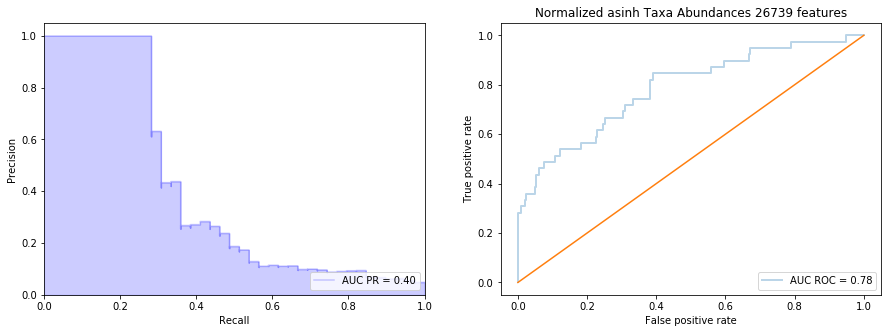

In [19]:
#Normalize with asinh
importlib.reload(hf)
target = "IBD"
f = plt.figure(figsize=(15,5))
X_train, X_val, X_test, y_train, y_val, y_test = hf.getMlInput(otu_train, otu_test, map_train, map_test, 
                                                            target = target, asinNormalized = True)
X_train = pd.concat([X_train, X_val], axis = 0)
y_train = y_train + y_val
plt.subplot(1, 2, 1)
auc_asin, auc_train_asin, fpr_asin, tpr_asin, prec_asin, f1_asin = hf.predictIBD(X_train, y_train, X_test, y_test, graphTitle = "Normalized asinh Taxa Abundances " + str(X_train.shape[1]) + " features",
              max_depth = 10, n_estimators = 65, weight = 5, plot = False, plot_pr = True)
plt.subplot(1, 2, 2)
auc_asin, auc_train_asin, fpr_asin, tpr_asin, prec_asin, f1_asin = hf.predictIBD(X_train, y_train, X_test, y_test, graphTitle = "Normalized asinh Taxa Abundances " + str(X_train.shape[1]) + " features",
              max_depth = 10, n_estimators = 65, weight = 5, plot = True, plot_pr = False)

f.savefig("C:/Users/ctata/Documents/Lab/quality_vectors/figures/curves_AGP_test_asin.pdf")

C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:597: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  map_norm = preprocessing.scale(mapping_data)
C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:597: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  map_norm = preprocessing.scale(mapping_data)
C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:597: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  map_norm = preprocessing.scale(mapping_data)


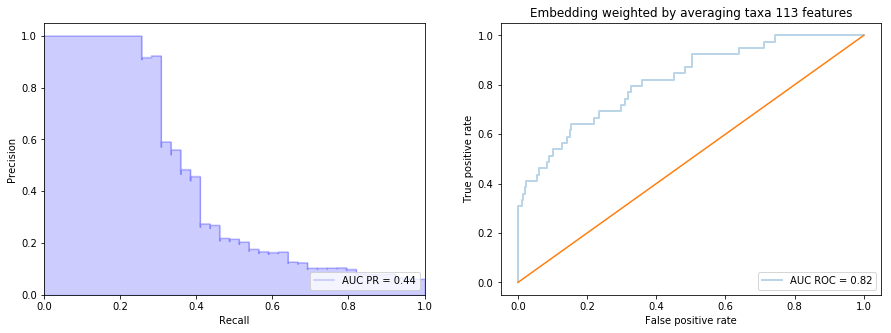

In [20]:
#Embed
f = plt.figure(figsize=(15,5))
X_train, X_val, X_test, y_train, y_val, y_test = hf.getMlInput(otu_train, otu_test, map_train, map_test, 
                                                            target = target, embed = True, qual_vecs = qual_vecs)
X_train = pd.concat([X_train, X_val], axis = 0)
y_train = y_train + y_val
plt.subplot(1, 2, 1)
auc_embed, auc_train_embed, fpr_embed, tpr_embed, prec_embed, f1_embed = hf.predictIBD(X_train, y_train, X_test, y_test, graphTitle = "Embedding weighted by averaging taxa "+ str(X_train.shape[1]) + " features",
              max_depth = 10, n_estimators = 170,  weight = 5, plot = False, plot_pr = True)
plt.subplot(1, 2, 2)
auc_embed, auc_train_embed, fpr_embed, tpr_embed, prec_embed, f1_embed = hf.predictIBD(X_train, y_train, X_test, y_test, graphTitle = "Embedding weighted by averaging taxa "+ str(X_train.shape[1]) + " features",
              max_depth = 10, n_estimators = 170,  weight = 5, plot = True, plot_pr = False)

f.savefig("C:/Users/ctata/Documents/Lab/quality_vectors/figures/curves_AGP_test_embed.pdf")

C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:597: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  map_norm = preprocessing.scale(mapping_data)
C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:597: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  map_norm = preprocessing.scale(mapping_data)
C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:597: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  map_norm = preprocessing.scale(mapping_data)


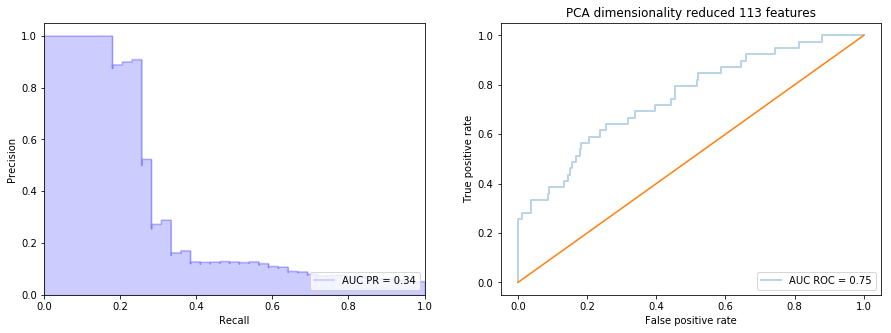

In [21]:
#PCA
f = plt.figure(figsize=(15,5))
X_train, X_val, X_test, y_train, y_val, y_test = hf.getMlInput(otu_train, otu_test, map_train, map_test, 
                                                            target = target, pca_reduced = True, numComponents = 100)
X_train = pd.concat([X_train, X_val], axis = 0)
y_train = y_train + y_val
plt.subplot(1, 2, 1)
auc_pca, auc_train_pca, fpr_pca, tpr_pca, prec_pca, f1_pca  = hf.predictIBD(X_train, y_train, X_test, y_test, graphTitle = "PCA dimensionality reduced " + str(X_train.shape[1]) + " features", 
              max_depth = 3, n_estimators = 110, weight = 5, plot = False, plot_pr = True)
plt.subplot(1, 2, 2)
auc_pca, auc_train_pca, fpr_pca, tpr_pca, prec_pca, f1_pca  = hf.predictIBD(X_train, y_train, X_test, y_test, graphTitle = "PCA dimensionality reduced " + str(X_train.shape[1]) + " features", 
              max_depth = 3, n_estimators = 110, weight = 5, plot = True, plot_pr = False)
f.savefig("C:/Users/ctata/Documents/Lab/quality_vectors/figures/curves_AGP_test_pca.pdf")

C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:589: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  data = pd.concat([pd.DataFrame(micro_norm), pd.DataFrame(map_norm)], axis = 1)
C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:589: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  data = pd.concat([pd.DataFrame(micro_norm), pd.DataFrame(map_norm)], axis = 1)
C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:589: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  data = pd.concat([pd.DataFrame(micro_norm), pd.DataFrame(map_norm)], axis = 1)
C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:589: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  data = pd.concat([pd.DataFr

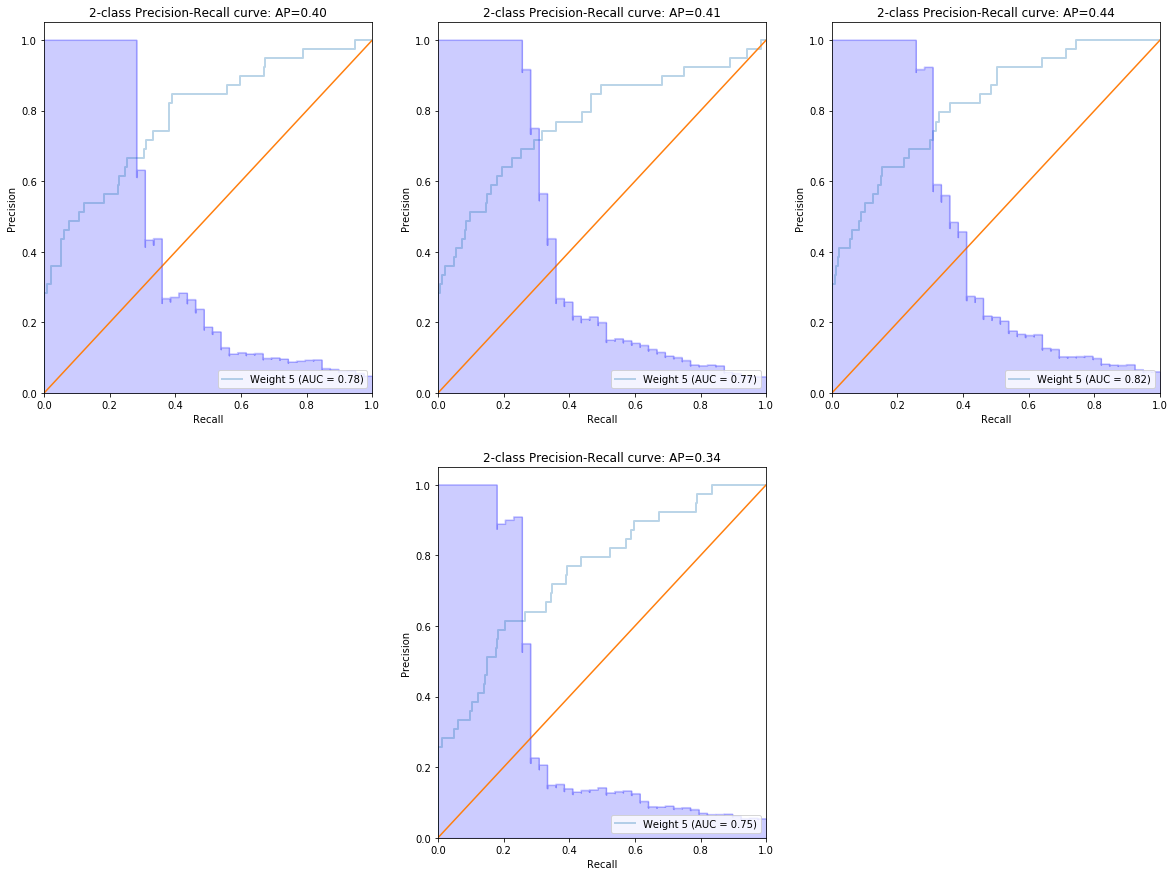

In [65]:
importlib.reload(hf)
plt.figure(figsize=(20,15))
i = 2
j = 3
target = "IBD"
plt.subplot(i,j, 1)
        

#Normalize with asinh
X_train, X_val, X_test, y_train, y_val, y_test = hf.getMlInput(otu_train, otu_test, map_train, map_test, 
                                                            target = target, asinNormalized = True)
X_train = pd.concat([X_train, X_val], axis = 0)
y_train = y_train + y_val
auc_asin, auc_train_asin, fpr_asin, tpr_asin, prec_asin, f1_asin = hf.predictIBD(X_train, y_train, X_test, y_test, graphTitle = "Normalized asinh Taxa Abundances " + str(X_train.shape[1]) + " features",
              max_depth = 10, n_estimators = 65, weight = 5, plot = False, plot_pr = True)

auc_asin, auc_train_asin, fpr_asin, tpr_asin, prec_asin, f1_asin = hf.predictIBD(X_train, y_train, X_test, y_test, graphTitle = "Normalized asinh Taxa Abundances " + str(X_train.shape[1]) + " features",
              max_depth = 10, n_estimators = 65, weight = 5, plot = True)

#Ideal is depth of 2 and trees of 110 -IBD
# Ideal is depth of 2 and trees 125 - GLUTEN

plt.subplot(i, j, 2)

#Normalize by percent
#X_train, X_val, X_test, y_train, y_val, y_test = hf.getMlInput(otu_train, otu_test, map_train, map_test, 
#                                                            target = target, percNormalized = True)
#X_train = pd.concat([X_train, X_val], axis = 0)
#y_train = y_train + y_val
#auc_comp, auc_train_comp, fpr_comp, tpr_comp, prec_comp, f1_comp = hf.predictIBD(X_train, y_train, X_test, y_test, graphTitle = "Compositional Taxa Abundances " + str(X_train.shape[1]) + " features",
#              max_depth = 10, n_estimators = 65, weight = 5, plot = False, plot_pr = True)

#auc_comp, auc_train_comp, fpr_comp, tpr_comp, prec_comp, f1_comp = hf.predictIBD(X_train, y_train, X_test, y_test, graphTitle = "Compositional Taxa Abundances " + str(X_train.shape[1]) + " features",
              max_depth = 10, n_estimators = 65, weight = 5, plot = True)
#IBD: 2, 110
#GLUTEN 3, 110



plt.subplot(i, j, 3)
#Embed Average
X_train, X_val, X_test, y_train, y_val, y_test = hf.getMlInput(otu_train, otu_test, map_train, map_test, 
                                                            target = target, embed = True, qual_vecs = qual_vecs)
X_train = pd.concat([X_train, X_val], axis = 0)
y_train = y_train + y_val
auc_embed, auc_train_embed, fpr_embed, tpr_embed, prec_embed, f1_embed = hf.predictIBD(X_train, y_train, X_test, y_test, graphTitle = "Embedding weighted by averaging taxa "+ str(X_train.shape[1]) + " features",
              max_depth = 10, n_estimators = 170,  weight = 5, plot = False, plot_pr = True)

auc_embed, auc_train_embed, fpr_embed, tpr_embed, prec_embed, f1_embed = hf.predictIBD(X_train, y_train, X_test, y_test, graphTitle = "Embedding weighted by averaging taxa "+ str(X_train.shape[1]) + " features",
              max_depth = 10, n_estimators = 170,  weight = 5, plot = True)

#Ideal is depth of 2 and trees of 95 - IBD
#IDeal is depth of 3 and trees of 110 - GLUTEN

#plt.subplot(i, j, 4)
#Pathway embeded
#X_train, X_val, X_test, y_train, y_val, y_test = getMlInput(otu_train, otu_test, map_train, map_test, 
#                                                            target = target, pathwayEmbed = True, qual_vecs = pathway_table)
#X_train = pd.concat([X_train, X_val], axis = 0)
#y_train = y_train + y_val
#hf.predictIBD(X_train, y_train, X_test, y_test, graphTitle = "Pathway space"+ str(X_train.shape[1]) + " features",
#              max_depth = 3, n_estimators = 95, plot = True)
#IBD: 3, 95
#GLUTEN: ?


plt.subplot(i, j, 5)
#PCA
X_train, X_val, X_test, y_train, y_val, y_test = hf.getMlInput(otu_train, otu_test, map_train, map_test, 
                                                            target = target, pca_reduced = True, numComponents = 100)
X_train = pd.concat([X_train, X_val], axis = 0)
y_train = y_train + y_val
auc_pca, auc_train_pca, fpr_pca, tpr_pca, prec_pca, f1_pca  = hf.predictIBD(X_train, y_train, X_test, y_test, graphTitle = "PCA dimensionality reduced " + str(X_train.shape[1]) + " features", 
              max_depth = 3, n_estimators = 110, weight = 5, plot = False, plot_pr = True)

auc_pca, auc_train_pca, fpr_pca, tpr_pca, prec_pca, f1_pca  = hf.predictIBD(X_train, y_train, X_test, y_test, graphTitle = "PCA dimensionality reduced " + str(X_train.shape[1]) + " features", 
              max_depth = 3, n_estimators = 110, weight = 5, plot = True)




In [67]:
print(f1_asin, f1_comp, f1_embed, f1_pca)

0.4081632653061224 0.4081632653061224 0.4081632653061224 0.3333333333333333


In [68]:
folds = 5
X_train_list, X_val_list, X_test, y_train_list, y_val_list, y_test = hf.getCrossValMlInput(otu_train, otu_test, map_train, map_test,target = target, embed = True, qual_vecs = qual_vecs, folds = folds)

C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:589: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  data = pd.concat([pd.DataFrame(micro_norm), pd.DataFrame(map_norm)], axis = 1)
C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:589: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  data = pd.concat([pd.DataFrame(micro_norm), pd.DataFrame(map_norm)], axis = 1)
C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:589: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  data = pd.concat([pd.DataFrame(micro_norm), pd.DataFrame(map_norm)], axis = 1)
C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:589: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  data = pd.concat([pd.DataFr

In [69]:
X_train, X_val, X_test, y_train, y_val, y_test = hf.getMlInput(otu_train, otu_test, map_train, map_test, 
                                                            target = target, embed = True, qual_vecs = qual_vecs)

C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:589: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  data = pd.concat([pd.DataFrame(micro_norm), pd.DataFrame(map_norm)], axis = 1)
C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:589: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  data = pd.concat([pd.DataFrame(micro_norm), pd.DataFrame(map_norm)], axis = 1)
C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:589: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  data = pd.concat([pd.DataFrame(micro_norm), pd.DataFrame(map_norm)], axis = 1)


## Metabolic Pathway Importance


In [51]:
def crossValPrediction(otu_use, y, max_depth = 10, n_estimators = 65, weight = 5):
    random.seed(123)
    f = plt.figure(figsize=(15,5))
    folds = 4
    kf = KFold(n_splits = folds)
    kf.get_n_splits(otu_use)
    
    auc_crossVal = []
    f1_crossVal = []
    feat_imp_crossVal = []
    i = 0
    for train_index, val_index in kf.split(otu_use):
        #plt.subplot(2,2, i + 1)
        otu_train = otu_use.iloc[train_index, :]
        otu_val = otu_use.iloc[val_index, :]
        y_train = np.array(y)[train_index]
        y_val = np.array(y)[val_index]
        
        plt.subplot(1, 2, 1)
        auc, auc_train, fpr, tpr, prec, f1, feat_imp = hf.predictIBD(otu_train, y_train, otu_val, y_val,
                  max_depth = max_depth, n_estimators = n_estimators, weight = weight, plot = True, plot_pr = True, feat_imp = True)
        
        #plt.subplot(1,2,2)
        #auc, auc_train, fpr, tpr, prec, f1 = hf.predictIBD(otu_train, y_train, otu_val, y_val,
        #           max_depth = max_depth, n_estimators = n_estimators, weight = weight, plot = True, plot_pr = False)
        auc_crossVal.append(auc)
        f1_crossVal.append(f1)
        feat_imp_crossVal.append(feat_imp)
        
        i = i + 1
    return(auc_crossVal, f1_crossVal, feat_imp_crossVal)

In [92]:
qual_vecs.index.values

array(['TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCTGATACTGGCAAGCTTGAGTCTCGTAGAGGGGGGTA',
       'TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGTGTGGCAAGTCTGATGTGAAAGGCATGGGCTCAACCTGTGGACTGCATTGGAAACTGTCATACTTGAGTGCCGGAGGGGTAAGCG',
       'TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGATGTTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGATATCTTGAGTGCAGTTGAGGCAGGCG',
       ...,
       'TTCCAGCTCCAATAGCGTATATTAAAGTTGTTGCAGTTAAAAAGCTCGTAGTTGGACCTTGGACCTGGACAGGCGGTCCGCCCCACGGCGAGTACTGTCTTGCTGGGTCTTTCCTCTTGGTGATCTGTTGTTTCGGCAGC',
       'TTCCAGCTCCAATAGCGTATATTAAAGTTGTTGCAGTTAAAAAGCTCGTAGTTGGACCTTGGACCTGGACAGGCGGTCCGCCTCACGGCGAGTACTGTCTTGCTGGGTCTTTCCTCTTGGGGATCTGTTGTTTCGGCAGC',
       '<unk>'], dtype=object)

In [94]:
X_train, X_val, X_test, y_train, y_val, y_test = hf.getMlInput(otu_train, otu_test, map_train, map_test, 
                                                            target = target, embed = True, qual_vecs = qual_vecs)
X_train = pd.concat([X_train, X_val], axis = 0)
y_train = y_train + y_val

C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:606: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  map_norm = preprocessing.scale(mapping_data)
C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:606: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  map_norm = preprocessing.scale(mapping_data)
C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:606: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  map_norm = preprocessing.scale(mapping_data)


In [103]:

X_train.columns

Index(['topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6',
       'topic_7', 'topic_8', 'topic_9', 'topic_10',
       ...
       'SEAFOOD_FREQUENCY', 'PROBIOTIC_FREQUENCY', 'OLIVE_OIL',
       'FRUIT_FREQUENCY', 'SLEEP_DURATION', 'SUGAR_SWEETENED_DRINK_FREQUENCY',
       'MILK_CHEESE_FREQUENCY', 'RED_MEAT_FREQUENCY', 'MEAT_EGGS_FREQUENCY',
       'VEGETABLE_FREQUENCY'],
      dtype='object', length=113)

c:\users\ctata\miniconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
c:\users\ctata\miniconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
c:\users\ctata\miniconda3\lib\site-packages\matplotlib\figure.py:98: Matplot

[0.2857142857142857, 0.4869565217391304, 0.39285714285714285, 0.3684210526315789]


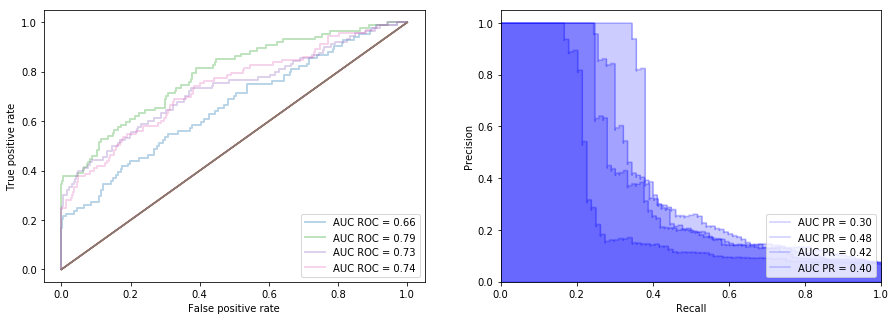

In [52]:
importlib.reload(hf)
import random
from sklearn.model_selection import KFold
auc_crossVal, f1_crossVal, feat_imp_crossVal = crossValPrediction(X_train, y_train,
                                                  max_depth = 10, n_estimators = 170,  weight = 5)
print(f1_crossVal)


In [104]:
feat_imp_crossVal[0]

[('topic_28', 0.03464173891010333),
 ('topic_93', 0.029093671030016127),
 ('topic_95', 0.02681140082461066),
 ('topic_77', 0.025688546129010108),
 ('topic_82', 0.024494945859101048),
 ('topic_44', 0.023004668481830078),
 ('topic_76', 0.02222524367687617),
 ('PROBIOTIC_FREQUENCY', 0.0207217130200099),
 ('topic_3', 0.016732684358086718),
 ('topic_67', 0.01597748867490212),
 ('topic_87', 0.015322448215884936),
 ('topic_57', 0.014446778517413276),
 ('topic_51', 0.013770206161282881),
 ('topic_27', 0.01371202513558382),
 ('topic_12', 0.01330124420308563),
 ('topic_66', 0.013133619833775772),
 ('topic_86', 0.012120072090321137),
 ('topic_50', 0.011738653773890393),
 ('MILK_CHEESE_FREQUENCY', 0.010890964519226835),
 ('topic_18', 0.010879618573574392),
 ('topic_39', 0.010851191419578007),
 ('topic_96', 0.010801468120243555),
 ('topic_33', 0.010510943954126495),
 ('topic_61', 0.010435621777703137),
 ('topic_40', 0.010426890928926593),
 ('topic_14', 0.010406593216096391),
 ('topic_55', 0.0102999

In [111]:
feat_imp_total = {}
feat_imp_total
for i in range(len(feat_imp_crossVal)):
    feat_imp_sort = sorted(feat_imp_crossVal[1], key = lambda t: t[0])
    keys = [j[0] for j in feat_imp_sort]
    values = [j[1] for j in feat_imp_sort]
    for key, value in feat_imp_sort:
        if key in feat_imp_total:
            feat_imp_total[key] += value
        else: 
            feat_imp_total[key] = value
feat_imp_total_labs = zip(feat_imp_total.keys(), feat_imp_total.values())
cum_importance_sort = sorted(feat_imp_total_labs, key = lambda t: t[1], reverse = True)
feat_imp_df = pd.DataFrame({'topics': [i[0] for i in cum_importance_sort],
             'cum_importance': [i[1] for i in cum_importance_sort]})
feat_imp_df = feat_imp_df.set_index("topics")

pathway_table = pd.read_csv("C:/Users/ctata/Documents/Lab/quality_vectors/data/AG_new/feces/piph/topic_pathway_dict.txt",
                            sep= "\t", dtype= {"pathway_id": 'object'})
pathway_table = pathway_table.set_index('topic')

tmp = pathway_table.loc[feat_imp_df.index.values, :]
feat_imp_df_paths = pd.merge(feat_imp_df, tmp, left_index = True, right_index = True)
feat_imp_df_paths.to_csv("C:/Users/ctata/Documents/Lab/quality_vectors/data/AG_new/feces/piph/metabolic_pathways_importance2.txt")

c:\users\ctata\miniconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [112]:
from sklearn.ensemble import RandomForestClassifier
max_depth = 2
n_estimators = 170
weight = 5
weights = {0:1, 1:weight}
m = RandomForestClassifier(max_depth= max_depth, random_state=0, n_estimators=n_estimators, class_weight = weights)
m.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 5},
            criterion='gini', max_depth=2, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=170, n_jobs=None, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [117]:
def getLeafInx(estimator):
    leaf_inx = np.where([i == -1 and j == -1 for i,j in zip(estimator.tree_.children_left, estimator.tree_.children_right)])
    return(leaf_inx[0])

def getLabels(estimator):
    value = estimator.tree_.value
    leaf_inx = getLeafInx(estimator)
    labels = []
    for val_set in value[leaf_inx]:
        val_set = np.squeeze(val_set)
        if val_set[0] > val_set[1]:
            val = "noIBD"
        else:
            val = "IBD"
        labels.append(val)
    return(labels)

pos_associations = {}
neg_associations = {}

estimators = m.estimators_
i = 0
for estimator in estimators:
    #print(i)
    features = estimator.tree_.feature + 1
    features = features[features > 0]
    labels = getLabels(estimator)
    leaf_inx = getLeafInx(estimator)
    op1 = [2, 3, 5, 6] #full set
    op2 = [2,3,4] #no test node right
    op3 = [1, 3, 4] # no test node left
    for feat in features:
        if not feat in pos_associations:
            pos_associations[feat] = {'noIBD': 0, 'IBD':0}
            neg_associations[feat] = {'noIBD': 0, 'IBD':0}

    if np.array_equal(leaf_inx , op1):
        #consider each permutation of possible labels on the left side 
        if labels[0] != labels[1]:
            neg_associations[features[1]][labels[0]] += 1
            pos_associations[features[1]][labels[1]] += 1

        if labels[0] == labels[1]:
            neg_associations[features[0]][labels[0]] += 1

        if labels[2] != labels[3]:
            neg_associations[features[2]][labels[2]] += 1
            pos_associations[features[2]][labels[3]] += 1
        if labels[2] == labels[3]:
            pos_associations[features[0]][labels[2]] += 1

    if np.array_equal(leaf_inx , op2):
        #consider each permutation of possible labels on the left side 
        if labels[0] != labels[1]:
            neg_associations[features[1]][labels[0]] += 1
            pos_associations[features[1]][labels[1]] += 1

        if labels[0] == labels[1]:
            neg_associations[features[0]][labels[0]] += 1

        pos_associations[features[0]][labels[2]] += 1

    if np.array_equal(leaf_inx , op3):
        neg_associations[features[0]][labels[0]] +=1

        if labels[1] != labels[2]:
            neg_associations[features[1]][labels[1]] += 1
            pos_associations[features[1]][labels[2]] += 1
        if labels[1] == labels[2]:
            pos_associations[features[0]][labels[1]] += 1
    i += 1
print(pos_associations)
print(neg_associations)



{39: {'noIBD': 6, 'IBD': 1}, 28: {'noIBD': 26, 'IBD': 0}, 65: {'noIBD': 0, 'IBD': 0}, 73: {'noIBD': 0, 'IBD': 2}, 61: {'noIBD': 2, 'IBD': 0}, 46: {'noIBD': 1, 'IBD': 0}, 52: {'noIBD': 4, 'IBD': 0}, 89: {'noIBD': 2, 'IBD': 4}, 77: {'noIBD': 20, 'IBD': 0}, 58: {'noIBD': 1, 'IBD': 0}, 111: {'noIBD': 0, 'IBD': 1}, 63: {'noIBD': 0, 'IBD': 1}, 86: {'noIBD': 4, 'IBD': 0}, 94: {'noIBD': 0, 'IBD': 1}, 82: {'noIBD': 0, 'IBD': 9}, 51: {'noIBD': 4, 'IBD': 0}, 93: {'noIBD': 0, 'IBD': 9}, 95: {'noIBD': 0, 'IBD': 9}, 24: {'noIBD': 0, 'IBD': 0}, 105: {'noIBD': 0, 'IBD': 7}, 12: {'noIBD': 0, 'IBD': 2}, 13: {'noIBD': 1, 'IBD': 0}, 76: {'noIBD': 18, 'IBD': 0}, 50: {'noIBD': 0, 'IBD': 3}, 44: {'noIBD': 0, 'IBD': 6}, 70: {'noIBD': 0, 'IBD': 3}, 101: {'noIBD': 3, 'IBD': 0}, 110: {'noIBD': 6, 'IBD': 0}, 87: {'noIBD': 0, 'IBD': 4}, 64: {'noIBD': 1, 'IBD': 0}, 66: {'noIBD': 0, 'IBD': 4}, 33: {'noIBD': 0, 'IBD': 0}, 47: {'noIBD': 0, 'IBD': 1}, 5: {'noIBD': 2, 'IBD': 0}, 27: {'noIBD': 0, 'IBD': 6}, 68: {'noIBD':

In [131]:
import re
def getAssociation(pos_associations, i):
    if pos_associations[i]['noIBD'] > pos_associations[i]['IBD']:
        return('HC ')
    if pos_associations[i]['noIBD'] == pos_associations[i]['IBD']:
        return('NA ')
    else: 
        return('IBD ')

topics = [re.sub("topic_", "", i) for i in feat_imp_df_paths.index.values]
association = np.array(['NA '] * len(topics))
i = 0
keys = [str(i) for i in pos_associations.keys()]
for topic in topics:
    if topic in keys:
        topic = int(topic)
        association[i] = getAssociation(pos_associations, topic)
    else:
        association[i] = "NA "
    i +=1

association

array(['HC ', 'NA ', 'IBD', 'HC ', 'IBD', 'IBD', 'IBD', 'HC ', 'IBD',
       'IBD', 'IBD', 'HC ', 'HC ', 'IBD', 'HC ', 'IBD', 'HC ', 'IBD',
       'IBD', 'NA ', 'HC ', 'HC ', 'IBD', 'IBD', 'NA ', 'IBD', 'IBD',
       'NA ', 'HC ', 'HC ', 'HC ', 'HC ', 'NA ', 'NA ', 'HC ', 'HC ',
       'HC ', 'IBD', 'NA ', 'HC ', 'NA ', 'IBD', 'IBD', 'NA ', 'NA ',
       'HC ', 'IBD', 'NA ', 'IBD', 'IBD', 'NA ', 'NA ', 'HC ', 'NA ',
       'HC ', 'HC ', 'NA ', 'HC ', 'NA ', 'HC ', 'HC ', 'IBD', 'HC ',
       'NA ', 'IBD', 'NA ', 'HC ', 'HC ', 'HC ', 'NA ', 'HC ', 'IBD',
       'NA ', 'NA ', 'NA ', 'IBD', 'HC ', 'IBD', 'NA ', 'IBD', 'IBD',
       'HC ', 'IBD', 'IBD', 'HC ', 'HC ', 'NA ', 'HC ', 'NA ', 'IBD',
       'NA ', 'NA ', 'NA ', 'HC ', 'NA ', 'NA ', 'HC ', 'NA ', 'NA ',
       'NA ', 'NA ', 'NA ', 'NA ', 'IBD', 'IBD', 'NA ', 'NA ', 'NA ',
       'NA ', 'NA ', 'NA ', 'NA ', 'NA '], dtype='<U3')

In [134]:
#feat_imp_df_paths.insert(3, "Association", association)
feat_imp_df_paths["Association"] = association
feat_imp_df_paths
feat_imp_df_paths.to_csv("C:/Users/ctata/Documents/Lab/quality_vectors/data/AG_new/feces/piph/metabolic_pathways_importance2.txt")

## Go no further

In [85]:
X_train, X_val, X_test, y_train, y_val, y_test = hf.getMlInput(otu_train, otu_test, map_train, map_test, 
                                                            target = "IBD", embed = True, qual_vecs = qual_vecs)

X_train = pd.concat([X_train, X_val], axis = 0)
y_train = y_train + y_val
X_train.columns.values[0:100] = pathway_table.loc[X_train.columns.values[0:100], "pathway_names"]

C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:606: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  map_norm = preprocessing.scale(mapping_data)
C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:606: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  map_norm = preprocessing.scale(mapping_data)
C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:606: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  map_norm = preprocessing.scale(mapping_data)


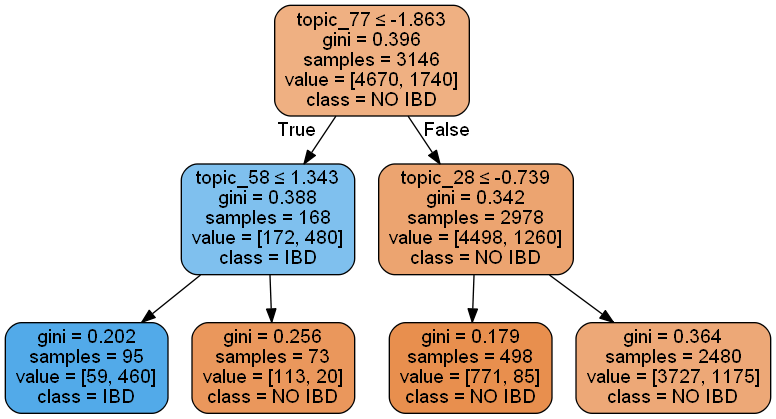

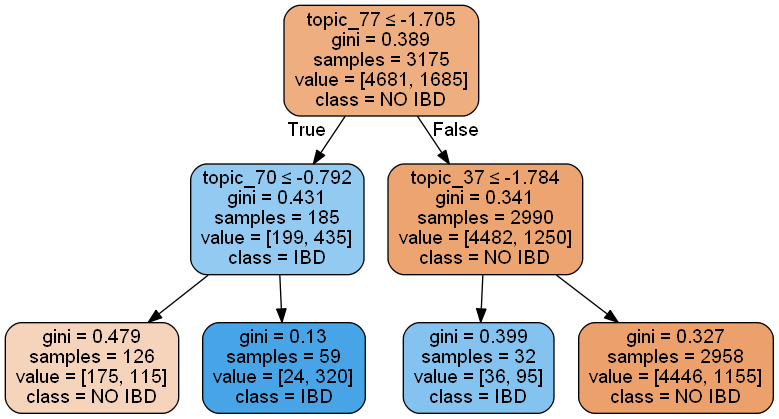

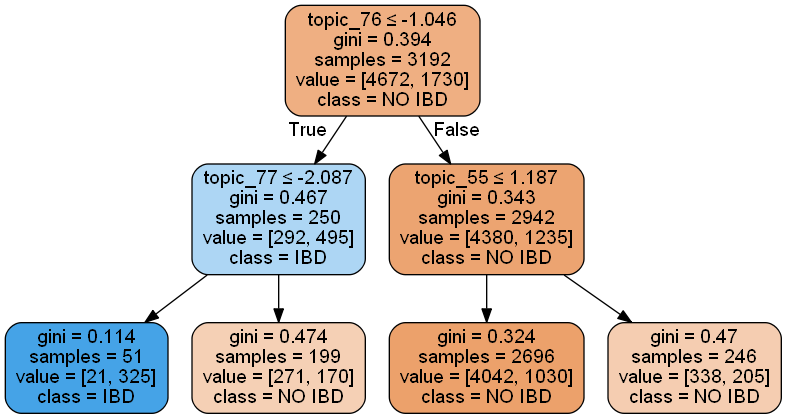

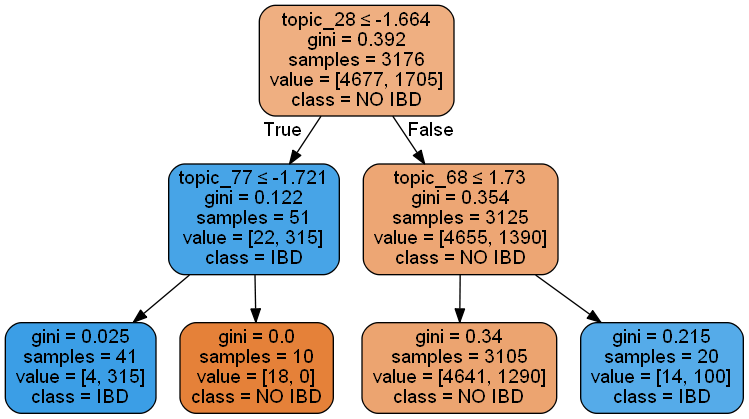

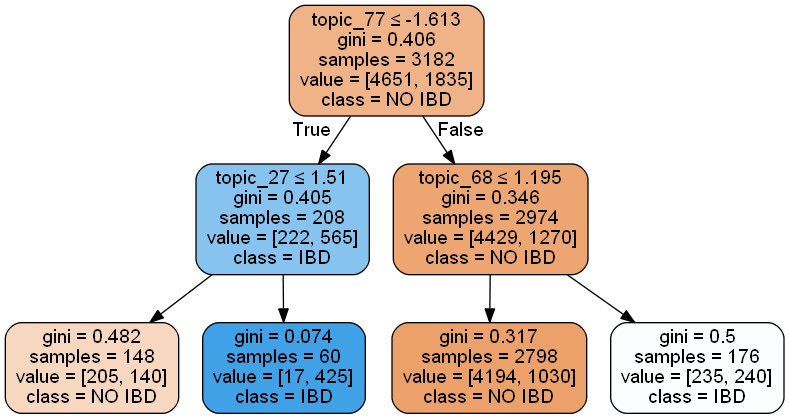

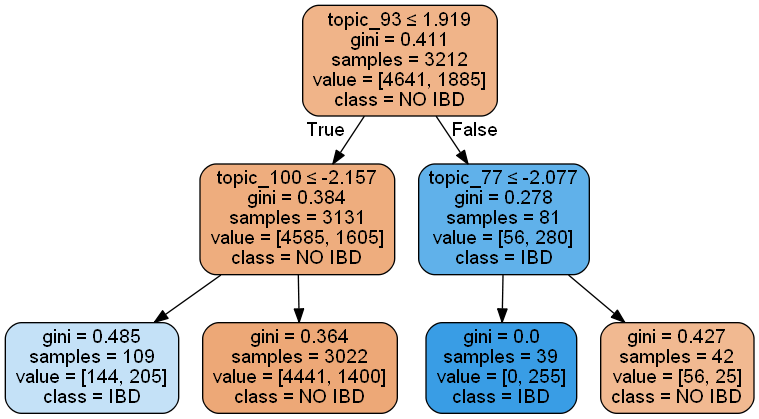

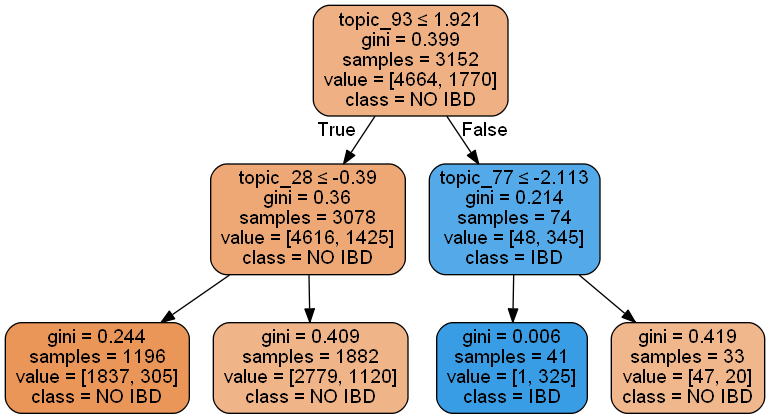

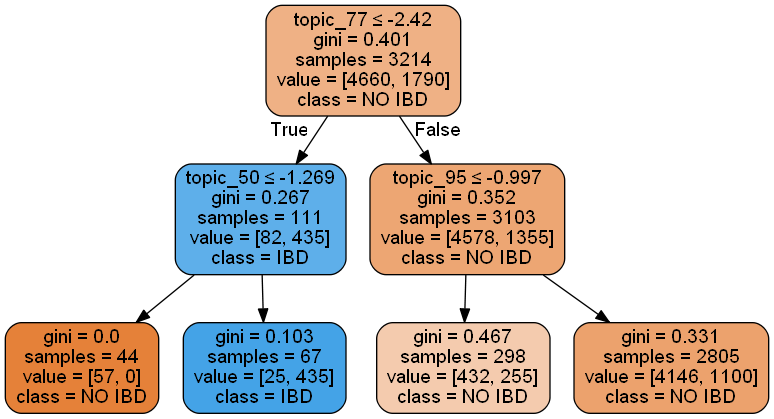

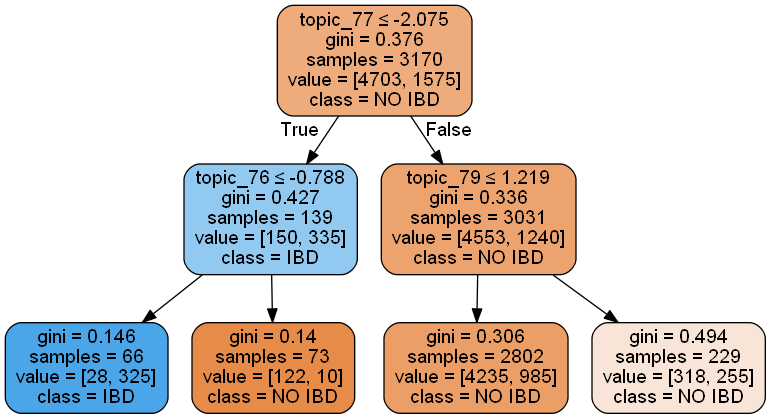

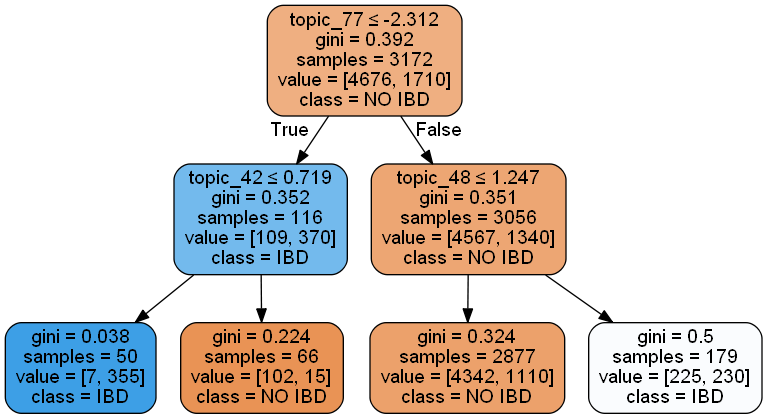

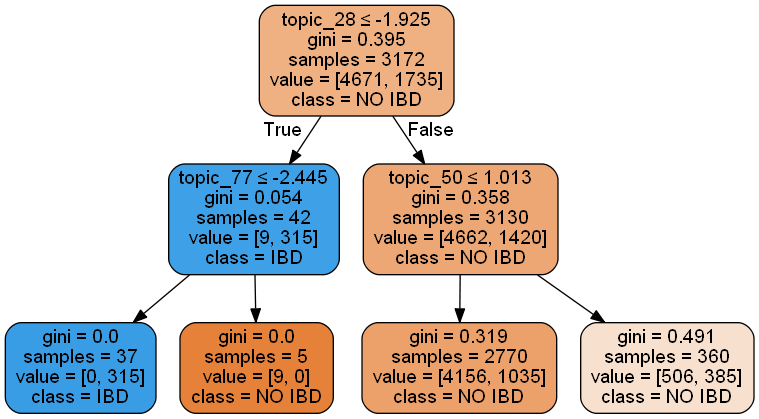

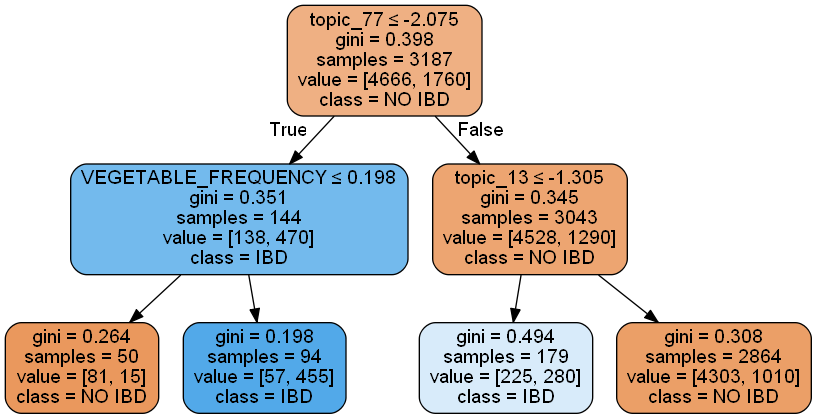

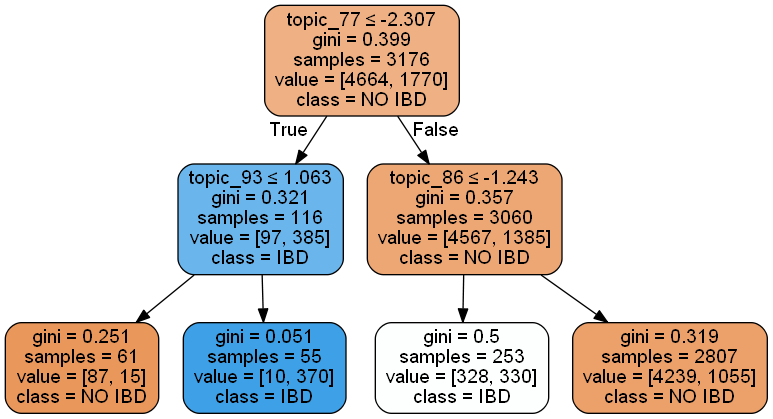

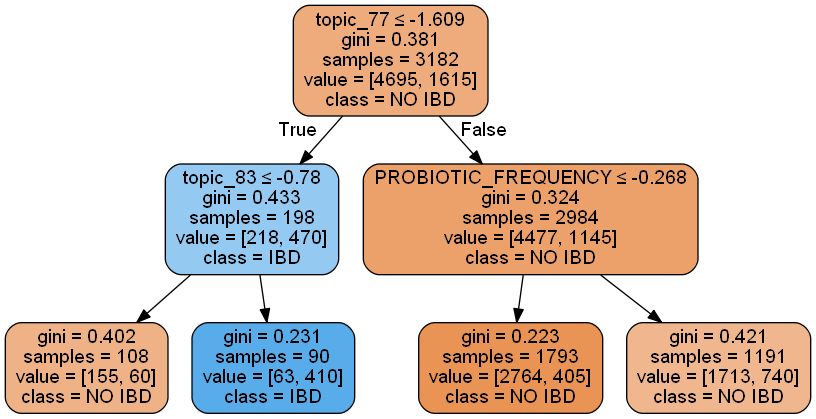

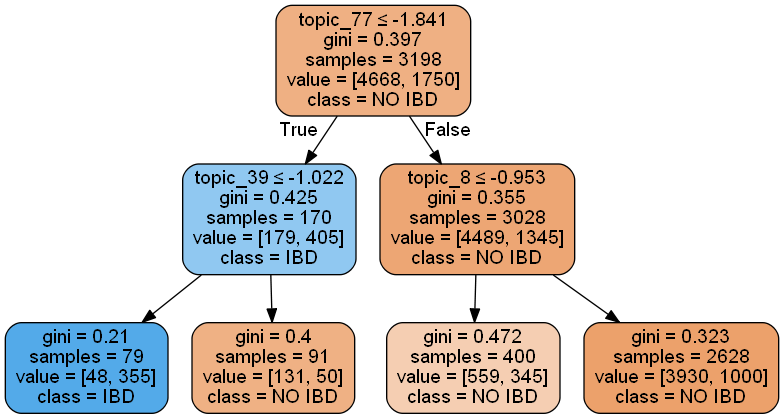

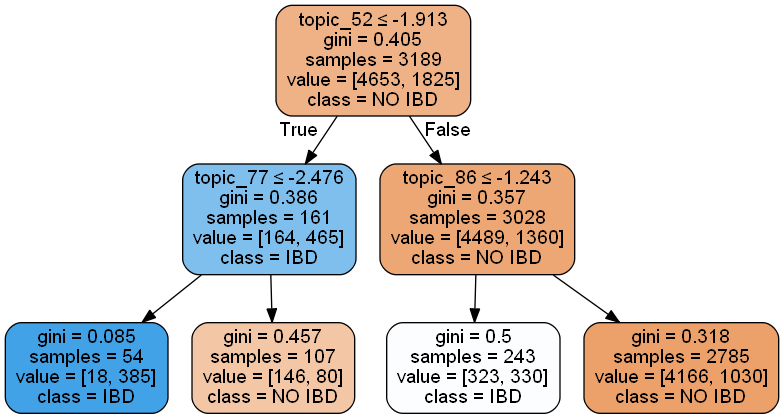

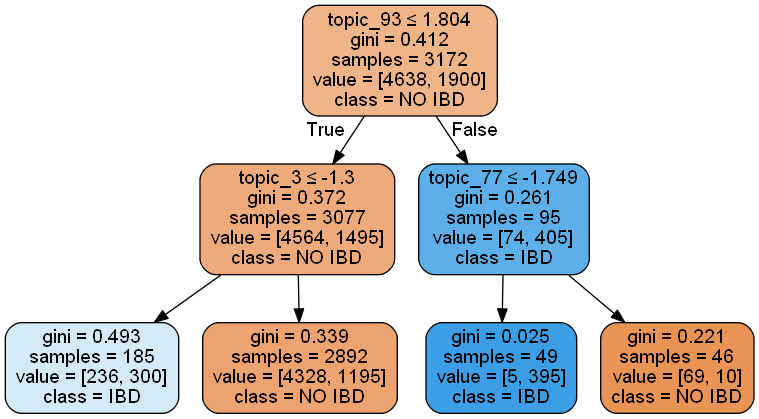

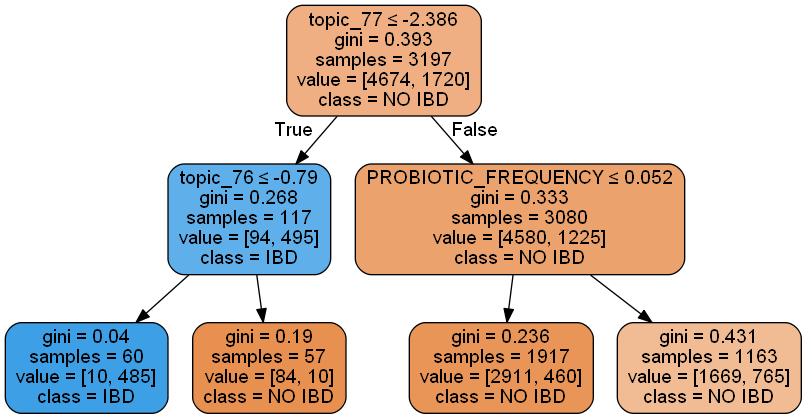

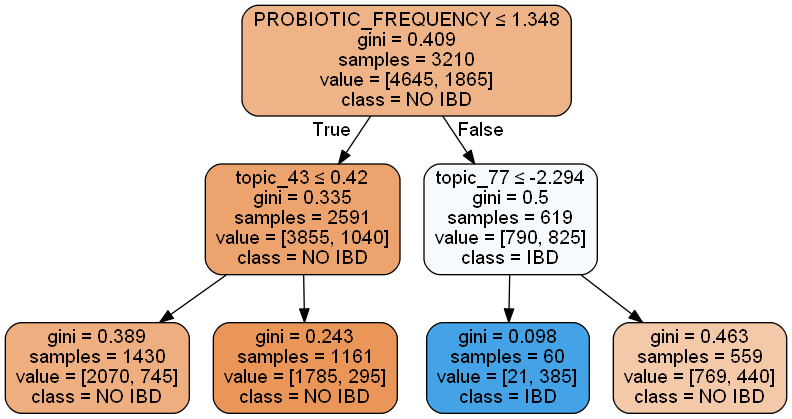

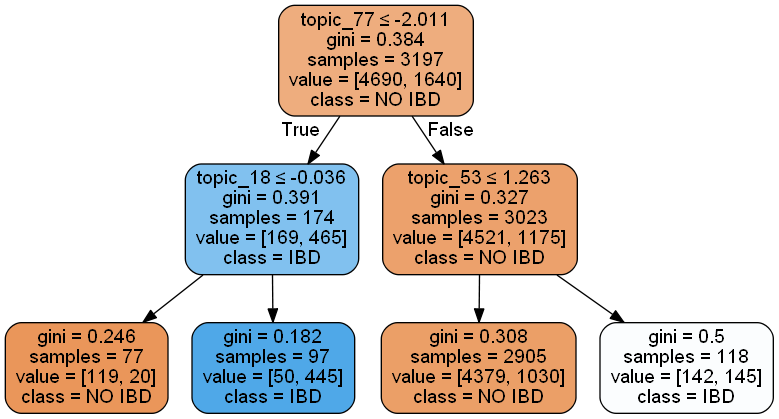

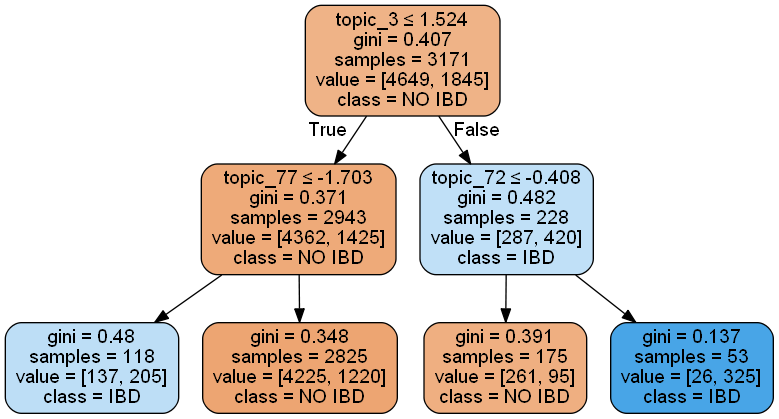

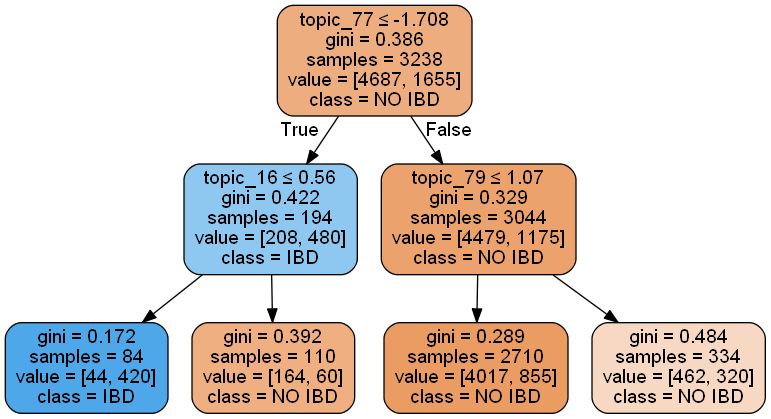

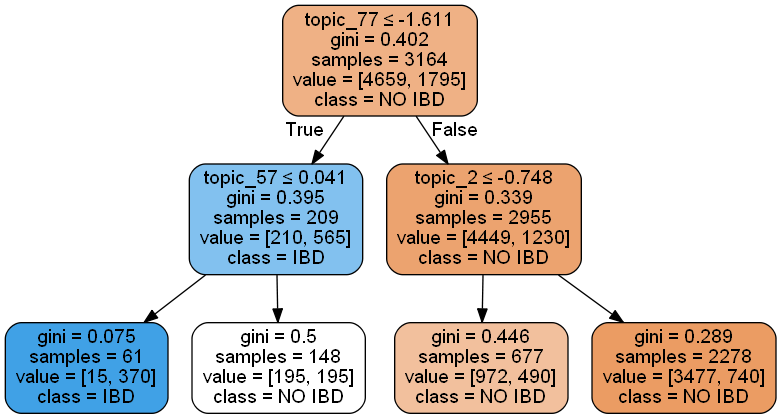

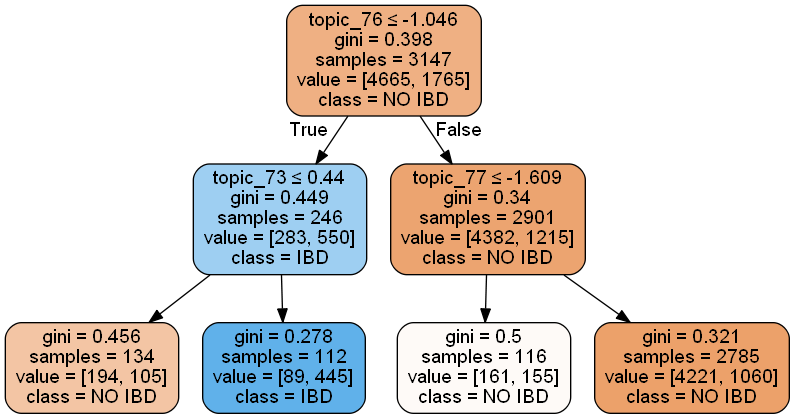

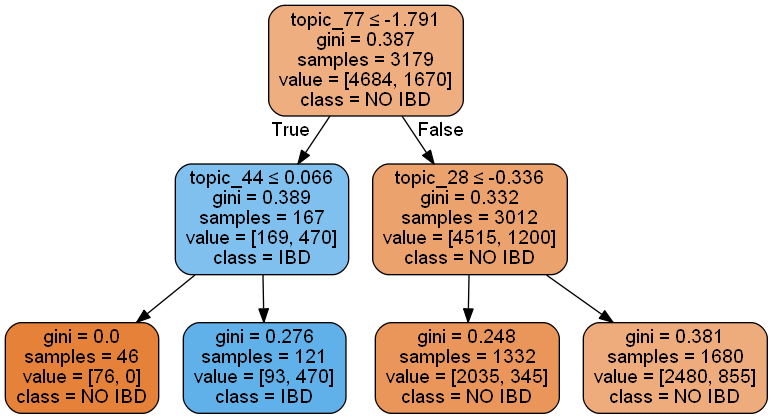

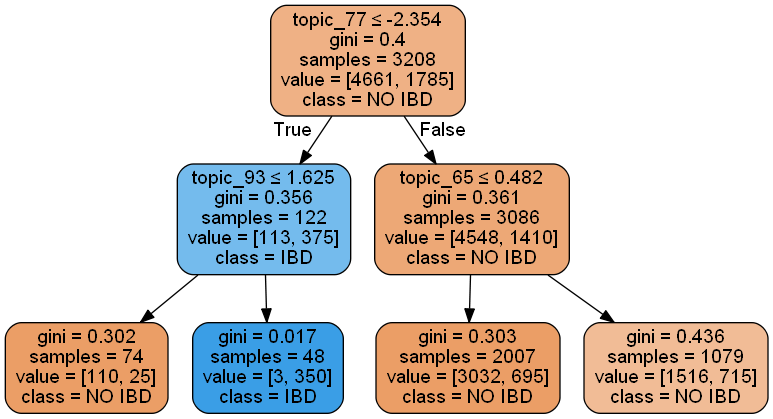

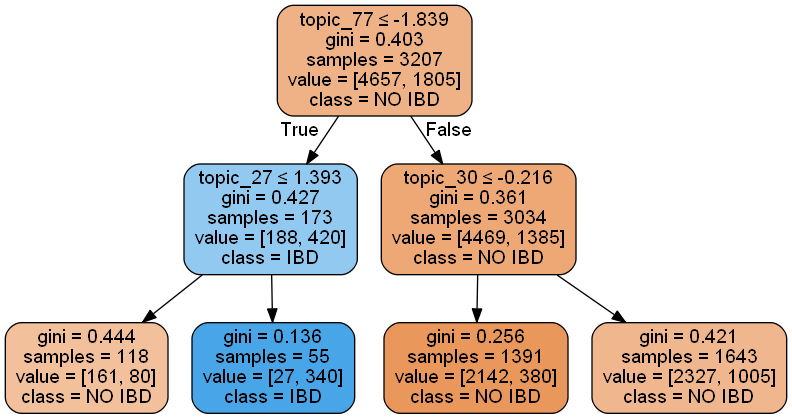

In [89]:
#X_train, X_val, X_test, y_train, y_val, y_test = hf.getMlInput(otu_train, otu_test, map_train, map_test, 
#                                                            target = "IBD", embed = True, qual_vecs = qual_vecs)

#X_train = pd.concat([X_train, X_val], axis = 0)
#y_train = y_train + y_val
from sklearn.ensemble import RandomForestClassifier
max_depth = 2
n_estimators = 170
weight = 5
weights = {0:1, 1:weight}
m = RandomForestClassifier(max_depth= max_depth, random_state=0, n_estimators=n_estimators, class_weight = weights)
m.fit(X_train, y_train)


from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

def makeDecisionTreeImage(est):
    dot_data = StringIO()
    export_graphviz(est, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True, feature_names =  X_test.columns.values, class_names=  ["NO IBD", "IBD"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png('diabetes.png')
    return(Image(graph.create_png()))

for i in range(n_estimators):
    est = m.estimators_[i]
    feat_inx = np.where(est.feature_importances_ > 0)
    tree_features = X_train.columns.values[feat_inx]
    if 'Steroid biosynthesis' in tree_features:
        display(makeDecisionTreeImage(est))

In [134]:
pathway_table = pd.read_csv("C:/Users/ctata/Documents/Lab/quality_vectors/data/AG_new/feces/piph/topic_pathway_dict.txt",
                            sep= "\t", dtype= {"pathway_id": 'object'})
pathway_table = pathway_table.set_index('topic')

In [142]:
keys = [i[0] for i in feat_imp_sort]
imp = [i[1] for i in feat_imp_sort]

topics_keep =[i in pathway_table.index.values for i in keys]
keys = np.array(keys)[topics_keep]
imp = np.array(imp)[topics_keep]

pathway_table_sort = pathway_table.loc[keys, :]
pathway_table_sort.insert(2, "Importance", imp, True) 

In [145]:
pathway_table_sort.to_csv("C:/Users/ctata/Documents/Lab/quality_vectors/data/AG_new/feces/piph/metabolic_pathways_importance.txt")

In [ ]:
#Modify so that the importance score is an average across folds
def reducedFeatures(table, feat_imp_sort, numFeatures = 20):
    selected_features = [x[0] for x in feat_imp_sort[0:numFeatures]]
    table_limited = table.loc[:, selected_features]
    return(table_limited, selected_features)


    
    
def getReducedFeatureData(X_train, X_val, X_test, y_train, y_val, y_test, max_depth = 2, n_estimators = 95,  weight = 20, numFeatures = 50):
    
    weights = {0:1, 1:weight}
    m = RandomForestClassifier(max_depth= max_depth, random_state=0, n_estimators= n_estimators, class_weight = weights)
    m.fit(X_train, y_train)
    probs = m.predict_proba(X_val)

    feat_imp = m.feature_importances_
    feat_imp_labeled = zip(X_test.columns.values, feat_imp)
    feat_imp_sort = sorted(feat_imp_labeled, key = lambda t: t[1], reverse = True)
    
    
    X_train, selected_features = reducedFeatures(X_train, feat_imp_sort, numFeatures = numFeatures)
    X_val, selected_features = reducedFeatures(X_val, feat_imp_sort, numFeatures = numFeatures)
    X_test, selected_fetures = reducedFeatures(X_test, feat_imp_sort, numFeatures = numFeatures)
    
    return(X_train, X_val, X_test, y_train, y_val, y_test, feat_imp_sort)

C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:453: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  plt.xlabel(pca.explained_variance_ratio_[0])
C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:453: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  plt.xlabel(pca.explained_variance_ratio_[0])
C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:453: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  plt.xlabel(pca.explained_variance_ratio_[0])
C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:453: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  plt.xlabel(pca.explained_variance_ratio_[0])
C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:453: DataCo

0.7083870967741935
0.7029032258064516
0.7450664136622391
0.6887855787476281


(0.5, 0.8)

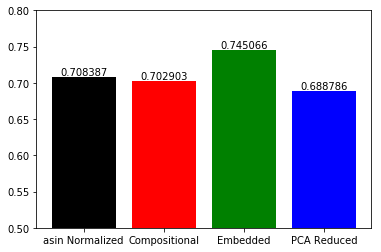

In [48]:
#At their best:
importlib.reload(hf)

################################################################################################
#Normalize with asinh
max_depth = 5
n_estimators = 50 
weight = 5

X_train, X_val, X_test, y_train, y_val, y_test = hf.getMlInput(otu_train, otu_test, map_train, map_test, 
                                                            target = target, asinNormalized = True)
X_train = pd.concat([X_train, X_val], axis = 0)
y_train = y_train + y_val
auc_asin, auc_train_asin, fpr_asin, tpr_asin = hf.predictIBD(X_train, y_train, X_test, y_test, graphTitle = "Normalized asinh Taxa Abundances " + str(X_train.shape[1]) + " features",
              max_depth = max_depth, n_estimators = n_estimators, weight = weight, plot = False)


##################################################################################################
#Normalize by percent
max_depth = 5
n_estimators = 50
weight = 5

X_train, X_val, X_test, y_train, y_val, y_test = hf.getMlInput(otu_train, otu_test, map_train, map_test, 
                                                            target = target, percNormalized = True)
X_train = pd.concat([X_train, X_val], axis = 0)
y_train = y_train + y_val
auc_comp, auc_train_comp, fpr_comp, tpr_comp= hf.predictIBD(X_train, y_train, X_test, y_test, graphTitle = "Compositional Taxa Abundances " + str(X_train.shape[1]) + " features",
              max_depth = max_depth, n_estimators = n_estimators , weight = weight, plot = False)

#######################################################################################################
#Embed Average
max_depth = 15
n_estimators = 50
weight = 5

X_train, X_val, X_test, y_train, y_val, y_test = hf.getMlInput(otu_train, otu_test, map_train, map_test, 
                                                            target = target, embed = True, qual_vecs = qual_vecs)
X_train = pd.concat([X_train, X_val], axis = 0)
y_train = y_train + y_val
auc_embed, auc_train_embed, fpr_embed, tpr_embed = hf.predictIBD(X_train, y_train, X_test, y_test, graphTitle = "Embedding weighted by averaging taxa "+ str(X_train.shape[1]) + " features",
              max_depth = max_depth, n_estimators = n_estimators , weight = weight, plot = False)


####################################################################################################
#PCA
max_depth = 10
n_estimators = 65 
weight = 1

X_train, X_val, X_test, y_train, y_val, y_test = hf.getMlInput(otu_train, otu_test, map_train, map_test, 
                                                            target = target, pca_reduced = True, numComponents = 250)
X_train = pd.concat([X_train, X_val], axis = 0)
y_train = y_train + y_val
auc_pca, auc_train_pca, fpr_pca, tpr_pca = hf.predictIBD(X_train, y_train, X_test, y_test, graphTitle = "PCA dimensionality reduced " + str(X_train.shape[1]) + " features", 
              max_depth = max_depth, n_estimators = n_estimators , weight = weight, plot = False)


fprs = [fpr_asin, fpr_comp, fpr_embed, fpr_pca]
tprs = [tpr_asin, tpr_comp, tpr_embed, tpr_pca]
aucs = [auc_asin, auc_comp, auc_embed, auc_pca]
methods = ["asin Normalized" , "Compositional", "Embedded", "PCA Reduced"]

bar = plt.bar(methods, aucs, color=['black', 'red', 'green', 'blue'])
i = 0
for rect in bar:
    height = aucs[i]
    print(height)
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%f' % height,  ha='center', va='bottom')
    i = i + 1
plt.ylim(.5, .8)

C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:453: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  plt.xlabel(pca.explained_variance_ratio_[0])
C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:453: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  plt.xlabel(pca.explained_variance_ratio_[0])
C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:453: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  plt.xlabel(pca.explained_variance_ratio_[0])
C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:453: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  plt.xlabel(pca.explained_variance_ratio_[0])
C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:453: DataCo

0.6383870967741936
0.5951138519924098
0.6744402277039848
0.6022390891840608


(0.5, 0.7)

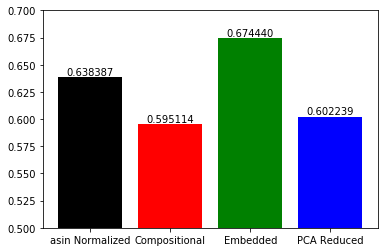

In [46]:
#At their worst

################################################################################################
#Normalize with asinh
max_depth = 2
n_estimators = 95
weight = 1

X_train, X_val, X_test, y_train, y_val, y_test = hf.getMlInput(otu_train, otu_test, map_train, map_test, 
                                                            target = target, asinNormalized = True)
X_train = pd.concat([X_train, X_val], axis = 0)
y_train = y_train + y_val
auc_asin, auc_train_asin, fpr_asin, tpr_asin = hf.predictIBD(X_train, y_train, X_test, y_test, graphTitle = "Normalized asinh Taxa Abundances " + str(X_train.shape[1]) + " features",
              max_depth = max_depth, n_estimators = n_estimators, weight = weight, plot = False)


##################################################################################################
#Normalize by percent
max_depth = 2
n_estimators = 95 
weight = 1

X_train, X_val, X_test, y_train, y_val, y_test = hf.getMlInput(otu_train, otu_test, map_train, map_test, 
                                                            target = target, percNormalized = True)
X_train = pd.concat([X_train, X_val], axis = 0)
y_train = y_train + y_val
auc_comp, auc_train_comp, fpr_comp, tpr_comp= hf.predictIBD(X_train, y_train, X_test, y_test, graphTitle = "Compositional Taxa Abundances " + str(X_train.shape[1]) + " features",
              max_depth = max_depth, n_estimators = n_estimators , weight = weight, plot = False)

#######################################################################################################
#Embed Average
max_depth = 15
n_estimators = 65 
weight = 1

X_train, X_val, X_test, y_train, y_val, y_test = hf.getMlInput(otu_train, otu_test, map_train, map_test, 
                                                            target = target, embed = True, qual_vecs = qual_vecs)
X_train = pd.concat([X_train, X_val], axis = 0)
y_train = y_train + y_val
auc_embed, auc_train_embed, fpr_embed, tpr_embed = hf.predictIBD(X_train, y_train, X_test, y_test, graphTitle = "Embedding weighted by averaging taxa "+ str(X_train.shape[1]) + " features",
              max_depth = max_depth, n_estimators = n_estimators , weight = weight, plot = False)


####################################################################################################
#PCA
max_depth = 10
n_estimators = 50 
weight = 100

X_train, X_val, X_test, y_train, y_val, y_test = hf.getMlInput(otu_train, otu_test, map_train, map_test, 
                                                            target = target, pca_reduced = True, numComponents = 250)
X_train = pd.concat([X_train, X_val], axis = 0)
y_train = y_train + y_val
auc_pca, auc_train_pca, fpr_pca, tpr_pca = hf.predictIBD(X_train, y_train, X_test, y_test, graphTitle = "PCA dimensionality reduced " + str(X_train.shape[1]) + " features", 
              max_depth = max_depth, n_estimators = n_estimators , weight = weight, plot = False)


fprs = [fpr_asin, fpr_comp, fpr_embed, fpr_pca]
tprs = [tpr_asin, tpr_comp, tpr_embed, tpr_pca]
aucs = [auc_asin, auc_comp, auc_embed, auc_pca]
methods = ["asin Normalized" , "Compositional", "Embedded", "PCA Reduced"]

bar = plt.bar(methods, aucs, color=['black', 'red', 'green', 'blue'], )
i = 0
for rect in bar:
    height = aucs[i]
    print(height)
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%f' % height,  ha='center', va='bottom')
    i = i + 1
plt.ylim(0.5, 0.7)

C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:453: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  map_norm = preprocessing.scale(mapping_data)
C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:453: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  map_norm = preprocessing.scale(mapping_data)
C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:453: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  map_norm = preprocessing.scale(mapping_data)
C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:453: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  map_norm = preprocessing.scale(mapping_data)
C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:453: DataCo

0.7319165085388994
0.721764705882353
0.7477039848197344
0.6616318785578748


(0.5, 0.8)

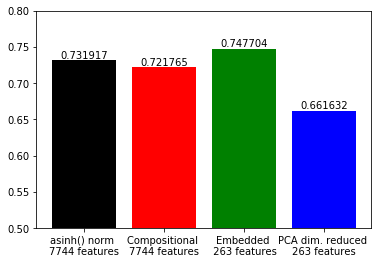

In [52]:
#One standard deviation

################################################################################################
#Normalize with asinh
max_depth = 15
n_estimators = 200
weight = 20

X_train, X_val, X_test, y_train, y_val, y_test = hf.getMlInput(otu_train, otu_test, map_train, map_test, 
                                                            target = target, asinNormalized = True)
X_train = pd.concat([X_train, X_val], axis = 0)
y_train = y_train + y_val
auc_asin, auc_train_asin, fpr_asin, tpr_asin = hf.predictIBD(X_train, y_train, X_test, y_test,
              max_depth = max_depth, n_estimators = n_estimators, weight = weight, plot = False)
asinTitle = "asinh() norm \n" + str(X_train.shape[1]) + " features"

##################################################################################################
#Normalize by percent
max_depth = 15
n_estimators = 200
weight = 20

X_train, X_val, X_test, y_train, y_val, y_test = hf.getMlInput(otu_train, otu_test, map_train, map_test, 
                                                            target = target, percNormalized = True)
X_train = pd.concat([X_train, X_val], axis = 0)
y_train = y_train + y_val
auc_comp, auc_train_comp, fpr_comp, tpr_comp= hf.predictIBD(X_train, y_train, X_test, y_test, 
              max_depth = max_depth, n_estimators = n_estimators , weight = weight, plot = False)
compTitle = "Compositional \n" + str(X_train.shape[1]) + " features"

#######################################################################################################
#Embed Average
max_depth = 5
n_estimators = 155
weight = 5

X_train, X_val, X_test, y_train, y_val, y_test = hf.getMlInput(otu_train, otu_test, map_train, map_test, 
                                                            target = target, embed = True, qual_vecs = qual_vecs)
X_train = pd.concat([X_train, X_val], axis = 0)
y_train = y_train + y_val
auc_embed, auc_train_embed, fpr_embed, tpr_embed = hf.predictIBD(X_train, y_train, X_test, y_test, 
              max_depth = max_depth, n_estimators = n_estimators , weight = weight, plot = False)

embedTitle = "Embedded \n "+ str(X_train.shape[1]) + " features"
####################################################################################################
#PCA
max_depth = 10
n_estimators = 110
weight = 1

X_train, X_val, X_test, y_train, y_val, y_test = hf.getMlInput(otu_train, otu_test, map_train, map_test, 
                                                            target = target, pca_reduced = True, numComponents = 250)
X_train = pd.concat([X_train, X_val], axis = 0)
y_train = y_train + y_val
auc_pca, auc_train_pca, fpr_pca, tpr_pca = hf.predictIBD(X_train, y_train, X_test, y_test, 
              max_depth = max_depth, n_estimators = n_estimators , weight = weight, plot = False)
pcaTitle = "PCA dim. reduced \n" + str(X_train.shape[1]) + " features"
################################################################################################
fprs = [fpr_asin, fpr_comp, fpr_embed, fpr_pca]
tprs = [tpr_asin, tpr_comp, tpr_embed, tpr_pca]
aucs = [auc_asin, auc_comp, auc_embed, auc_pca]
methods = [asinTitle, compTitle, embedTitle, pcaTitle]

bar = plt.bar(methods, aucs, color=['black', 'red', 'green', 'blue'], )
i = 0
for rect in bar:
    height = aucs[i]
    print(height)
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%f' % height,  ha='center', va='bottom')
    i = i + 1
plt.ylim(0.5, 0.8)

In [54]:
pathway_table.shape

NameError: name 'pathway_table' is not defined

Text(0.5,1,'ROC by input method')

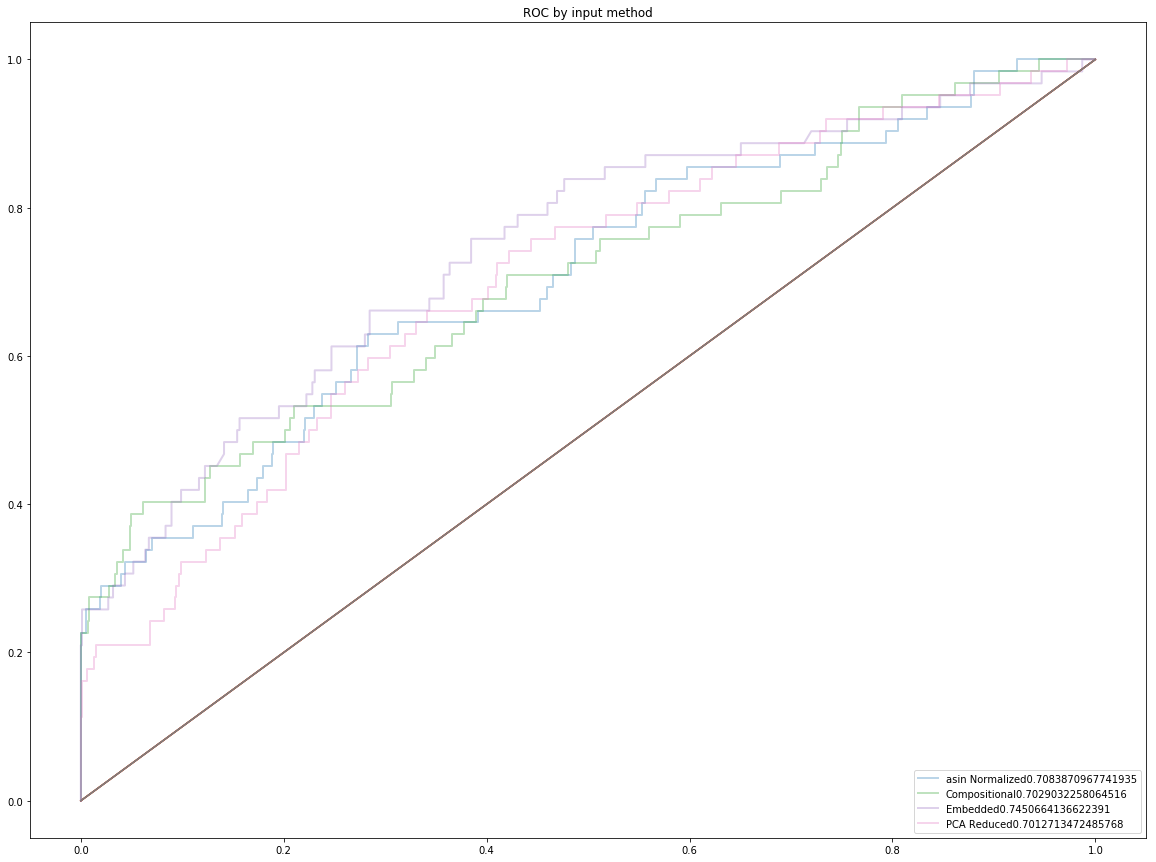

In [20]:
plt.figure(figsize=(20,15))
weights = [5,5,5,1]
fprs = [fpr_asin, fpr_comp, fpr_embed, fpr_pca]
tprs = [tpr_asin, tpr_comp, tpr_embed, tpr_pca]
aucs = [auc_asin, auc_comp, auc_embed, auc_pca]
methods = ["asin Normalized" , "Compositional", "Embedded", "PCA Reduced"]
for fpr, tpr, weight, auc, method in zip(fprs, tprs, weights, aucs, methods):
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label = method + str(auc))

    x = np.linspace(0, 1, 10)
    plt.plot(x, x)
plt.legend(loc="lower right")
plt.title("ROC by input method")

C:\Users\ctata\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  
C:\Users\ctata\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  
C:\Users\ctata\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


([0.7620244001107161,
  0.7671272737595901,
  0.752762577980284,
  0.7493452849873314],
 [0.8195427239689856,
  0.8160221744606602,
  0.7961437714493709,
  0.7490753118464081])

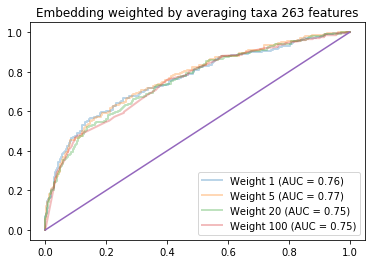

In [244]:
#Embed Average
X_train, X_val, X_test, y_train, y_val, y_test = getMlInput(otu_train, otu_test, map_train, map_test, 
                                                            target = target, embed = True, qual_vecs = qual_vecs_denoise)
X_train = pd.concat([X_train, X_val], axis = 0)
y_train = y_train + y_val
hf.predictIBD(X_train, y_train, X_test, y_test, graphTitle = "Embedding weighted by averaging taxa "+ str(X_train.shape[1]) + " features",
              max_depth = 3, n_estimators = 110, plot = True)


Here we start playing with increasing sparsity of the taxa membership in a topic and the number of topics used to predict

In [82]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier


#Embed using sparse quality vector 
#qual_vecs_reduced = copy.deepcopy(qual_vecs_taxReduced)
#qual_vecs_reduced[np.abs(qual_vecs_taxReduced) < .3 ] = 0

def reducedFeatures(table, feat_imp_sort, numFeatures = 20):
    selected_features = [x[0] for x in feat_imp_sort[0:numFeatures]]
    table_limited = table.loc[:, selected_features]
    return(table_limited, selected_features)

def getReducedFeatureData(X_train, X_val, X_test, y_train, y_val, y_test, max_depth = 2, n_estimators = 95,  weight = 20, numFeatures = 50):
    
    weights = {0:1, 1:weight}
    m = RandomForestClassifier(max_depth= max_depth, random_state=0, n_estimators= n_estimators, class_weight = weights)
    m.fit(X_train, y_train)
    probs = m.predict_proba(X_val)

    feat_imp = m.feature_importances_
    feat_imp_labeled = zip(X_test.columns.values, feat_imp)
    feat_imp_sort = sorted(feat_imp_labeled, key = lambda t: t[1], reverse = True)
    
    
    X_train, selected_features = reducedFeatures(X_train, feat_imp_sort, numFeatures = numFeatures)
    X_val, selected_features = reducedFeatures(X_val, feat_imp_sort, numFeatures = numFeatures)
    X_test, selected_fetures = reducedFeatures(X_test, feat_imp_sort, numFeatures = numFeatures)
    
    return(X_train, X_val, X_test, y_train, y_val, y_test, feat_imp_sort)

C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:527: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  map_norm = preprocessing.scale(mapping_data)
C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:527: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  map_norm = preprocessing.scale(mapping_data)
C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:527: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  map_norm = preprocessing.scale(mapping_data)
C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:527: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  map_norm = preprocessing.scale(mapping_data)
C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:527: DataCo

0.7041366223908918
0.7086527514231499
0.7488235294117647
0.66426944971537


(0.5, 0.8)

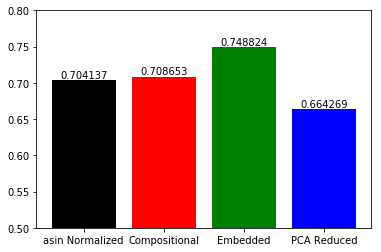

In [88]:
#At their best, with reduced feature set:
importlib.reload(hf)
numFeatures = 250
################################################################################################
#Normalize with asinh
max_depth = 5
n_estimators = 50 
weight = 5

X_train, X_val, X_test, y_train, y_val, y_test = hf.getMlInput(otu_train, otu_test, map_train, map_test, 
                                                            target = target, asinNormalized = True)
X_train, X_val, X_test, y_train, y_val, y_test, feat_imp_sort = getReducedFeatureData(X_train, X_val, X_test, y_train, y_val, y_test,
                                                                      max_depth = max_depth, n_estimators = n_estimators, weight = weight, numFeatures = numFeatures)
X_train = pd.concat([X_train, X_val], axis = 0)
y_train = y_train + y_val
auc_asin, auc_train_asin, fpr_asin, tpr_asin = hf.predictIBD(X_train, y_train, X_test, y_test, graphTitle = "Normalized asinh Taxa Abundances " + str(X_train.shape[1]) + " features",
              max_depth = max_depth, n_estimators = n_estimators, weight = weight, plot = False)


##################################################################################################
#Normalize by percent
max_depth = 5
n_estimators = 50
weight = 5

X_train, X_val, X_test, y_train, y_val, y_test = hf.getMlInput(otu_train, otu_test, map_train, map_test, 
                                                            target = target, percNormalized = True)
X_train, X_val, X_test, y_train, y_val, y_test, feat_imp_sort  = getReducedFeatureData(X_train, X_val, X_test, y_train, y_val, y_test,
                                                                      max_depth = max_depth, n_estimators = n_estimators, weight = weight, numFeatures = numFeatures)
X_train = pd.concat([X_train, X_val], axis = 0)
y_train = y_train + y_val
auc_comp, auc_train_comp, fpr_comp, tpr_comp= hf.predictIBD(X_train, y_train, X_test, y_test, graphTitle = "Compositional Taxa Abundances " + str(X_train.shape[1]) + " features",
              max_depth = max_depth, n_estimators = n_estimators , weight = weight, plot = False)

#######################################################################################################
#Embed Average
max_depth = 15
n_estimators = 50
weight = 5

X_train, X_val, X_test, y_train, y_val, y_test = hf.getMlInput(otu_train, otu_test, map_train, map_test, 
                                                            target = target, embed = True, qual_vecs = qual_vecs)
X_train, X_val, X_test, y_train, y_val, y_test, feat_imp_sort  = getReducedFeatureData(X_train, X_val, X_test, y_train, y_val, y_test,
                                                                      max_depth = max_depth, n_estimators = n_estimators, weight = weight, numFeatures = numFeatures)
X_train = pd.concat([X_train, X_val], axis = 0)
y_train = y_train + y_val
auc_embed, auc_train_embed, fpr_embed, tpr_embed = hf.predictIBD(X_train, y_train, X_test, y_test, graphTitle = "Embedding weighted by averaging taxa "+ str(X_train.shape[1]) + " features",
              max_depth = max_depth, n_estimators = n_estimators , weight = weight, plot = False)


####################################################################################################
#PCA
max_depth = 10
n_estimators = 65 
weight = 1

X_train, X_val, X_test, y_train, y_val, y_test = hf.getMlInput(otu_train, otu_test, map_train, map_test, 
                                                            target = target, pca_reduced = True, numComponents = 250)
X_train, X_val, X_test, y_train, y_val, y_test, feat_imp_sort  = getReducedFeatureData(X_train, X_val, X_test, y_train, y_val, y_test,
                                                                      max_depth = max_depth, n_estimators = n_estimators, weight = weight, numFeatures = numFeatures)
X_train = pd.concat([X_train, X_val], axis = 0)
y_train = y_train + y_val
auc_pca, auc_train_pca, fpr_pca, tpr_pca = hf.predictIBD(X_train, y_train, X_test, y_test, graphTitle = "PCA dimensionality reduced " + str(X_train.shape[1]) + " features", 
              max_depth = max_depth, n_estimators = n_estimators , weight = weight, plot = False)


fprs = [fpr_asin, fpr_comp, fpr_embed, fpr_pca]
tprs = [tpr_asin, tpr_comp, tpr_embed, tpr_pca]
aucs = [auc_asin, auc_comp, auc_embed, auc_pca]
methods = ["asin Normalized" , "Compositional", "Embedded", "PCA Reduced"]

bar = plt.bar(methods, aucs, color=['black', 'red', 'green', 'blue'])
i = 0
for rect in bar:
    height = aucs[i]
    print(height)
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%f' % height,  ha='center', va='bottom')
    i = i + 1
plt.ylim(.5, .8)

In [105]:
feat_imp

[('2-Oxocarboxylic acid metabolism', 0.06429544412625218),
 ('PROBIOTIC_FREQUENCY', 0.05804104024696788),
 ('Geraniol degradation', 0.040565657219033775),
 ('Phosphotransferase system (PTS)', 0.04001419024715071),
 ('Polycyclic aromatic hydrocarbon degradation', 0.03947817552961466),
 ('Selenocompound metabolism', 0.022457717972429354),
 ('Secondary bile acid biosynthesis', 0.021797746096486926),
 ('Cyanoamino acid metabolism', 0.020120443540090616),
 ('Chloroalkane and chloroalkene degradation', 0.01859491469625375),
 ('Limonene and pinene degradation', 0.018327029703827807),
 ('Phosphotransferase system (PTS)', 0.01684965267680242),
 ('Mannose type O-glycan biosynthesis', 0.015773061610172712),
 ('Phosphotransferase system (PTS)', 0.01556084512139542),
 ('Bacterial invasion of epithelial cells', 0.01435681983249039),
 ('Xylene degradation', 0.01326506938917637),
 ('Xylene degradation', 0.013057576812683627),
 ('Secondary bile acid biosynthesis', 0.012171996005856538),
 ('Lipopolysacc

C:\Users\ctata\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys
C:\Users\ctata\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys
C:\Users\ctata\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys
C:\Users\ctata\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys
C:\Users\ctata\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all co

([0.6926329468212715,
  0.7033486605357857,
  0.7059976009596162,
  0.7039984006397442,
  0.697171131547381],
 [0.7541912292377688,
  0.7922116024546387,
  0.8035454181577892,
  0.8081531946539845,
  0.8262228193292138])

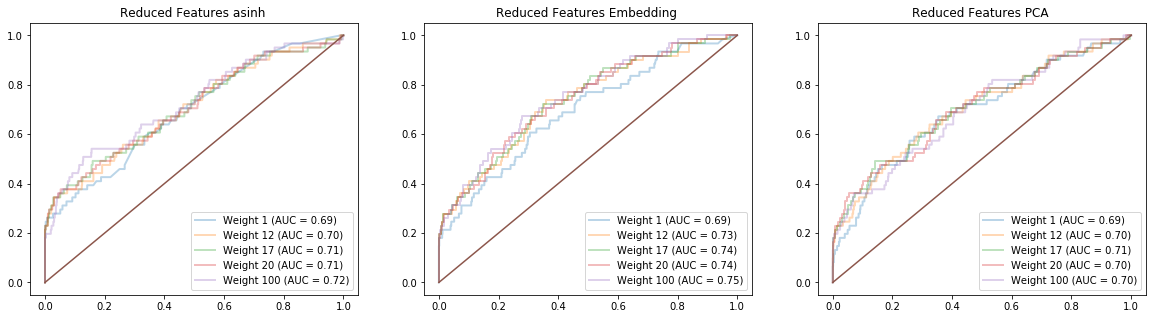

In [994]:
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
X_train, X_val, X_test, y_train, y_val, y_test = getMlInput(otu_train, otu_test, map_train, map_test, 
                                                            target = "IBD", asinNormalized = True)
X_train, X_val, X_test, y_train, y_val, y_test, _ = getReducedFeatureData(X_train, X_val, X_test, y_train, y_val, y_test, max_depth = 2, n_estimators = 95)
X_train = pd.concat([X_train, X_val], axis = 0)
y_train = y_train + y_val
hf.predictIBD(X_train, y_train, X_test, y_test, graphTitle = "Reduced Features asinh " + str(X_train.shape[1]) + " features",
              max_depth = 2, n_estimators = 110, plot = True)

###############################
plt.subplot(1, 3, 2)
X_train, X_val, X_test, y_train, y_val, y_test = getMlInput(otu_train, otu_test, map_train, map_test, 
                                                            target = "IBD", embed = True, qual_vecs = qual_vecs)
X_train, X_val, X_test, y_train, y_val, y_test, _ = getReducedFeatureData(X_train, X_val, X_test, y_train, y_val, y_test, max_depth = 2, n_estimators = 95)
X_train = pd.concat([X_train, X_val], axis = 0)
y_train = y_train + y_val
hf.predictIBD(X_train, y_train, X_test, y_test, graphTitle = "Reduced Features Embedding " + str(X_train.shape[1]) + " features",
              max_depth = 2, n_estimators = 95, plot = True)

###################################
plt.subplot(1, 3, 3)
X_train, X_val, X_test, y_train, y_val, y_test = getMlInput(otu_train, otu_test, map_train, map_test, 
                                                            target = "IBD", pca_reduced = True, numComponents = 250)
X_train, X_val, X_test, y_train, y_val, y_test, _ = getReducedFeatureData(X_train, X_val, X_test, y_train, y_val, y_test, max_depth = 2, n_estimators = 95)
X_train = pd.concat([X_train, X_val], axis = 0)
y_train = y_train + y_val
hf.predictIBD(X_train, y_train, X_test, y_test, graphTitle = "Reduced Features PCA " + str(X_train.shape[1]) + " features",
              max_depth = 2, n_estimators = 80, plot = True)

## Use embeddings trained including sample information - bust

In [ ]:
#Transform to one hot
map_train_1hot = pd.concat([pd.get_dummies(map_train[col], prefix = col) for col in map_train], axis=1)
map_test_1hot = pd.concat([pd.get_dummies(map_test[col], prefix = col) for col in map_test], axis=1)

map_train_1hot = map_train_1hot.drop(["IBD_0", "IBD_1"], axis = 1)
map_train_1hot["IBD"] = map_train["IBD"]

map_test_1hot = map_test_1hot.drop(["IBD_0", "IBD_1"], axis = 1)
map_test_1hot["IBD"] = map_test["IBD"]

sample_vars = map_train_1hot.columns.values
sample_vars
qual_vec_file = "../data/AG_new/feces/glove_emb_AG_new07perc_feces_sampledata_250.txt"
qual_vec_tmp = pd.read_csv(qual_vec_file, sep = " ", index_col = 0, header=None, dtype = {0:str})
qual_vec_tmp.columns = ['topic_' + str(i) for i in range(1, qual_vec_tmp.shape[1]+1)]
qual_vec_sampledata = qual_vec_tmp.loc[ sample_vars, :]
qual_vec_sampledata
qual_vec_use = pd.concat([qual_vecs, qual_vec_sampledata], axis = 0)
qual_vec_use = qual_vec_use.drop("IBD")

merge_train = pd.concat([otu_train, map_train_1hot], axis = 1)
merge_test = pd.concat([otu_test, map_test_1hot], axis = 1)


X_train, X_val, X_test, y_train, y_val, y_test = getMlInput(merge_train, merge_test,
                                                            map_train, map_test, 
                                                            target = "IBD", embed = True, qual_vecs = qual_vec_use)


## Explore each decision tree to understand the directionality of each variable

In [74]:
#Great, now we have a minimal model that makes ok predictions - time to try to interpret it
X_train, X_val, X_test, y_train, y_val, y_test = hf.getMlInput(otu_train, otu_test, map_train, map_test, 
                                                            target = "IBD", embed = True, qual_vecs = qual_vecs,
                                                           naming = "pathways")
X_train, X_val, X_test, y_train, y_val, y_test, _ = getReducedFeatureData(X_train, X_val, X_test, y_train, y_val, y_test, 
                                                                          max_depth = 2, n_estimators = 95, numFeatures = 250)
X_train = pd.concat([X_train, X_val], axis = 0)
y_train = y_train + y_val

max_depth = 2
n_estimators = 95
weight = 20
weights = {0:1, 1:weight}
m = RandomForestClassifier(max_depth= max_depth, random_state=0, n_estimators=n_estimators, class_weight = weights)
m.fit(X_train, y_train)

C:\Users\ctata\Documents\Lab\quality_vectors\scripts\helper_functions.py:606: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  def setTarget(mapping, target = ""):


NameError: name 'pathway_dict' is not defined

In [22]:
X_train, X_val, X_test, y_train, y_val, y_test = hf.getMlInput(otu_train, otu_test, map_train, map_test, 
                                                            target = "IBD", embed = True, qual_vecs = qual_vecs,
                                                           naming = "pathways")
X_train, X_val, X_test, y_train, y_val, y_test, _ = getReducedFeatureData(X_train, X_val, X_test, y_train, y_val, y_test, 
                                                                          max_depth = 2, n_estimators = 95, numFeatures = 250)
X_train = pd.concat([X_train, X_val], axis = 0)
y_train = y_train + y_val

max_depth = 2
n_estimators = 95
weight = 20
weights = {0:1, 1:weight}
m = RandomForestClassifier(max_depth= max_depth, random_state=0, n_estimators=n_estimators, class_weight = weights)
m.fit(X_train, y_train)

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

def makeDecisionTreeImage(est):
    dot_data = StringIO()
    export_graphviz(est, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True, feature_names =  X_test.columns.values, class_names=  ["NO IBD", "IBD"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png('diabetes.png')
    return(Image(graph.create_png()))

for i in range(95):
    est = m.estimators_[i]
    feat_inx = np.where(est.feature_importances_ > 0)
    tree_features = X_test.columns.values[feat_inx]
    if 'Geraniol degradation' in tree_features:
        display(makeDecisionTreeImage(est))

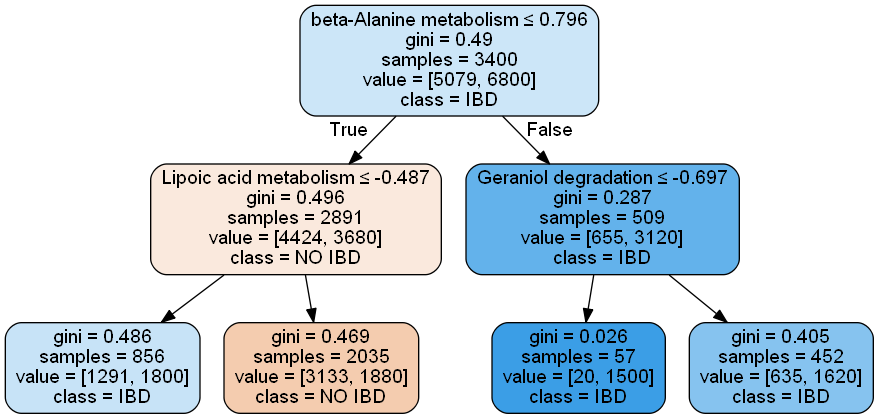

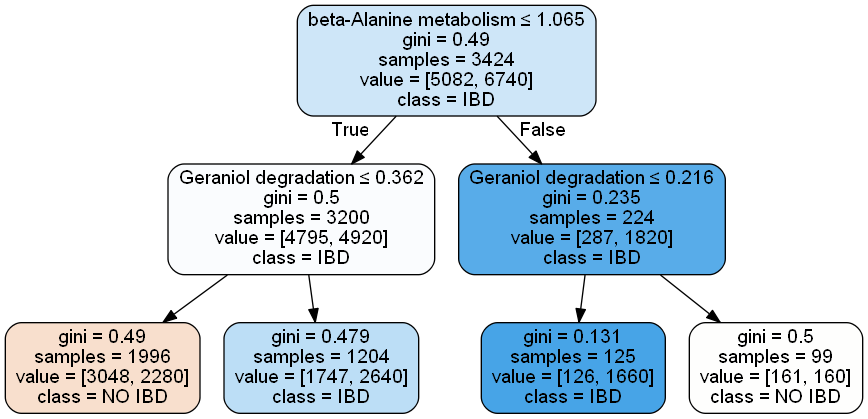

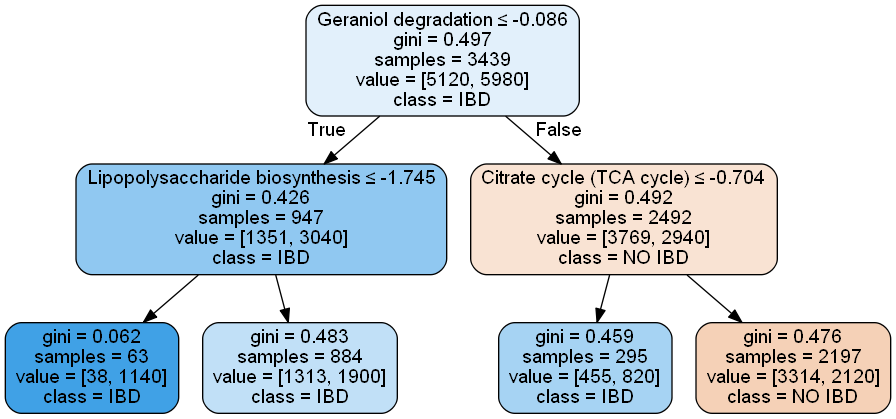

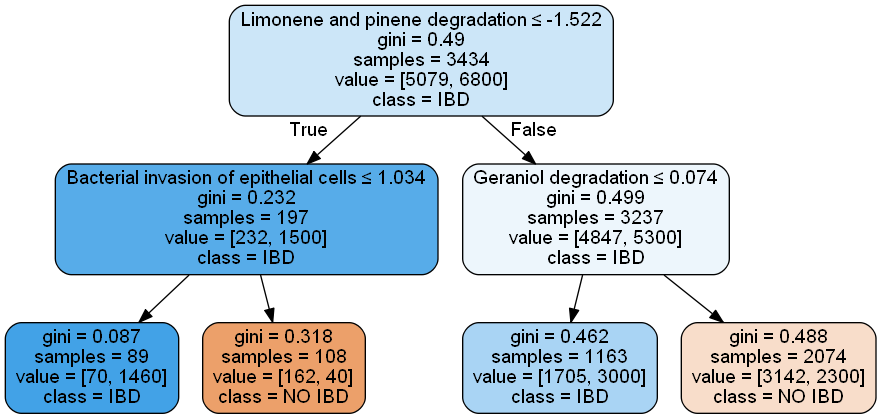

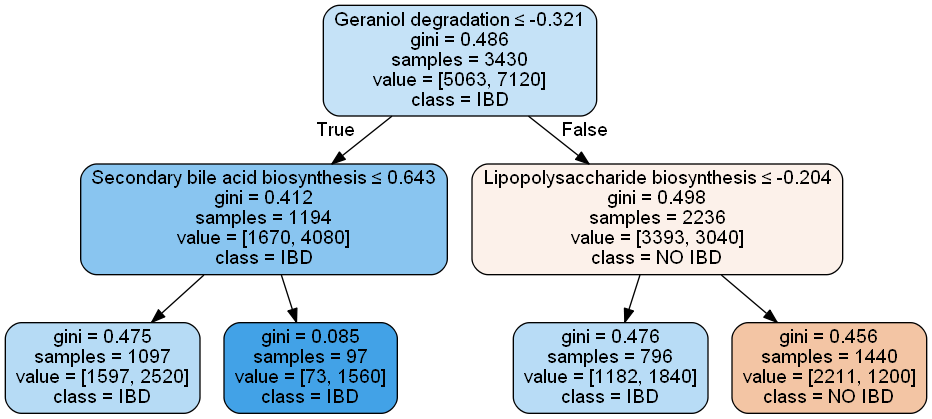

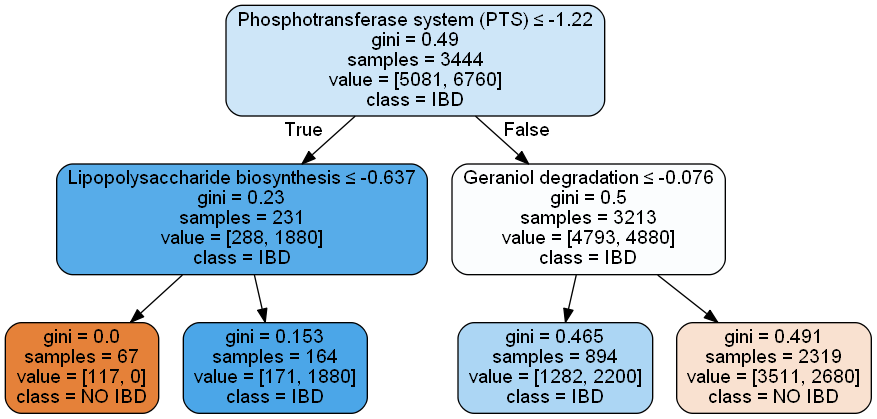

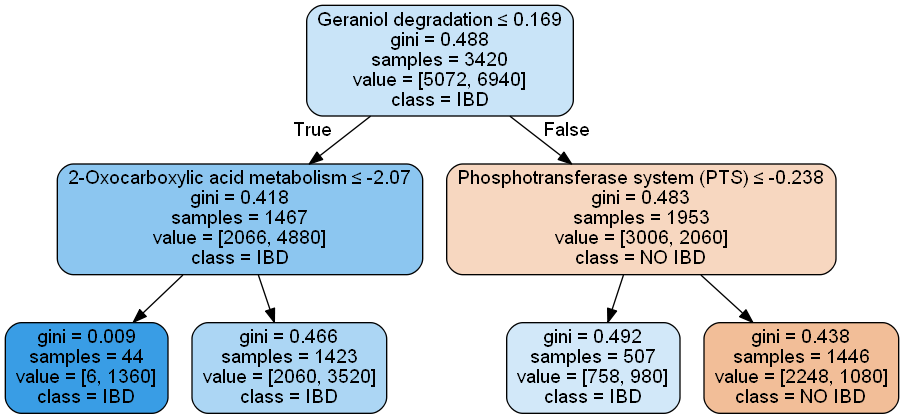

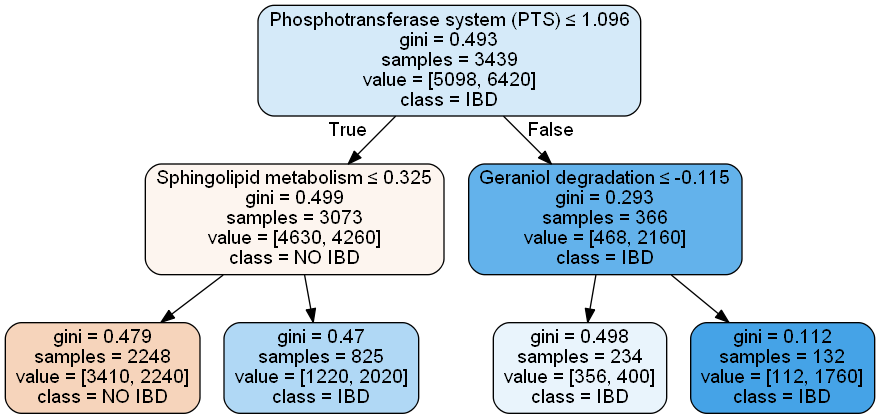

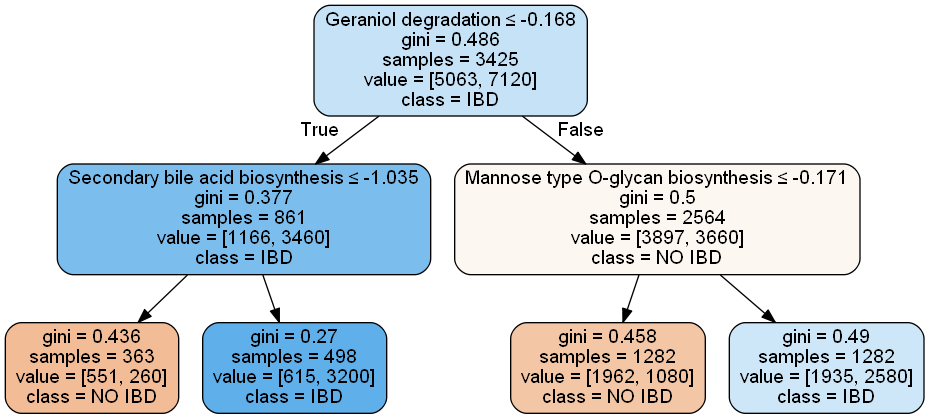

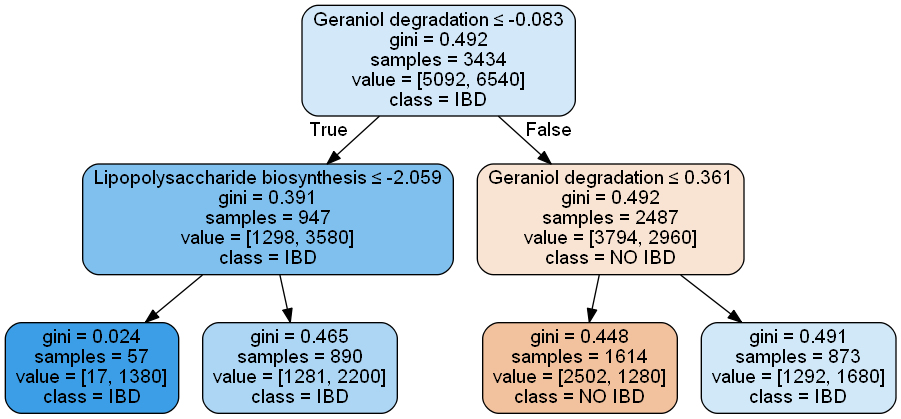

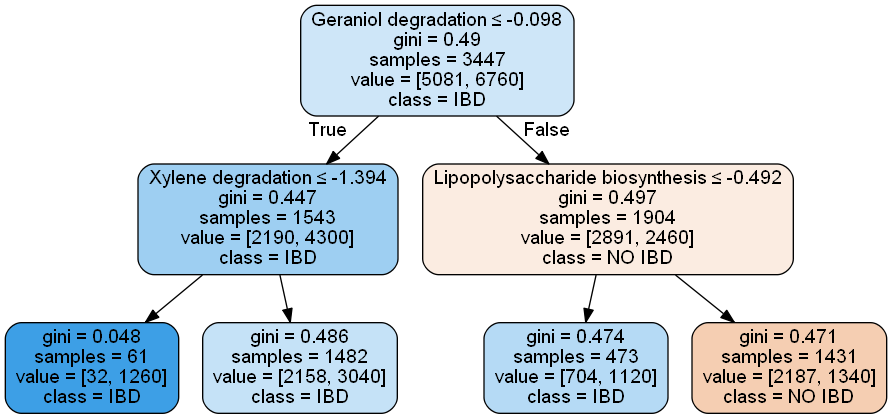

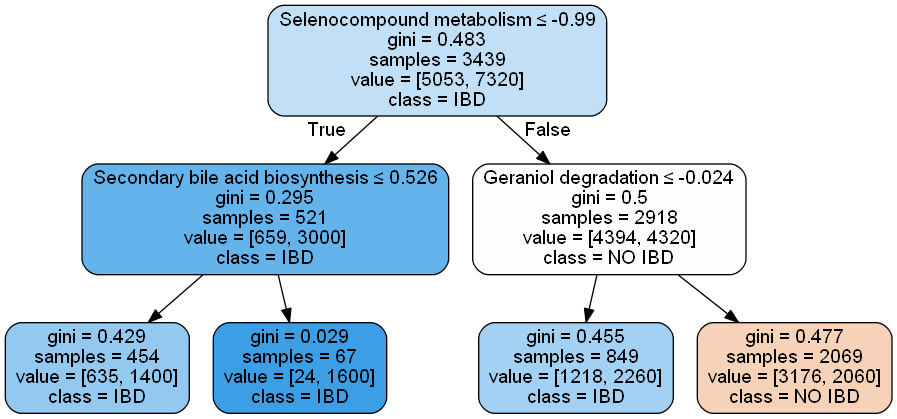

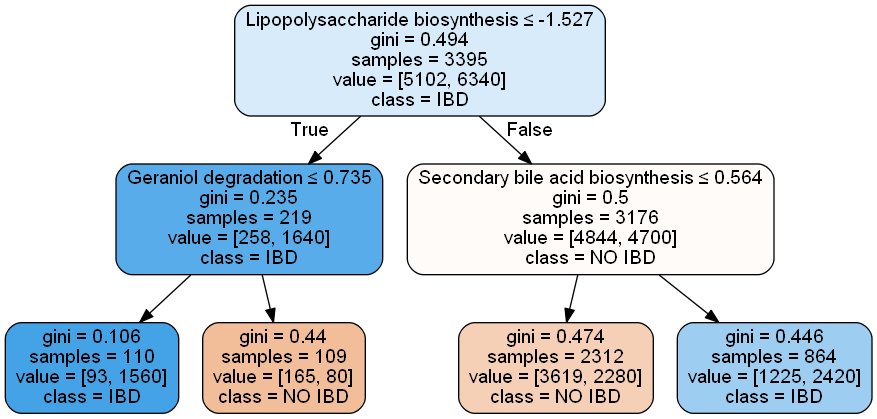

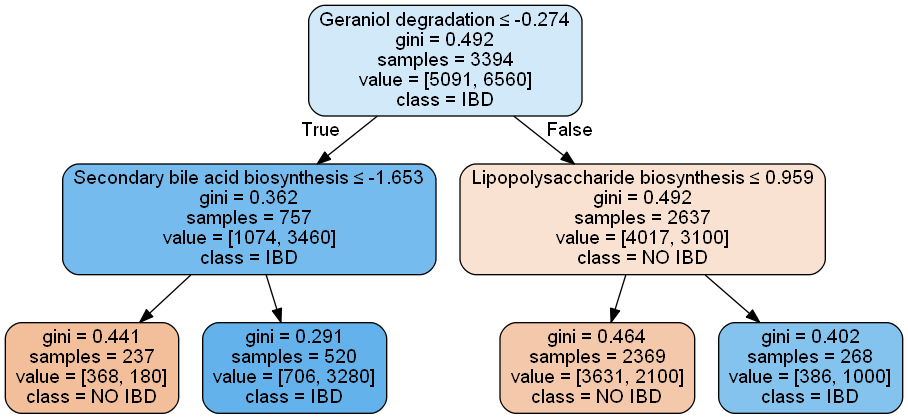

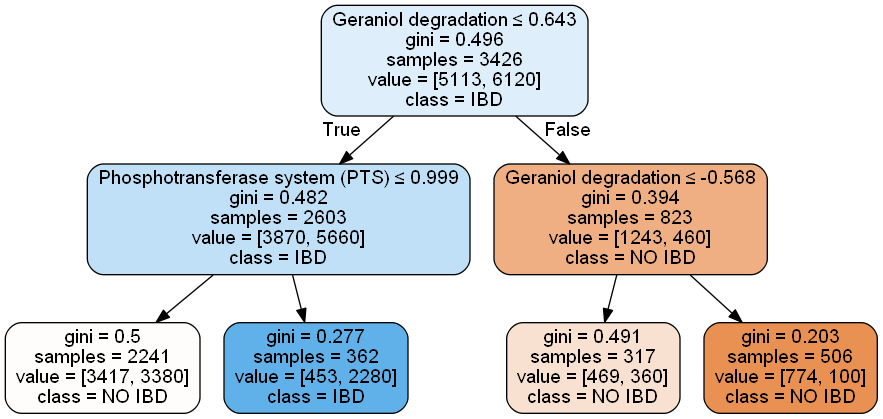

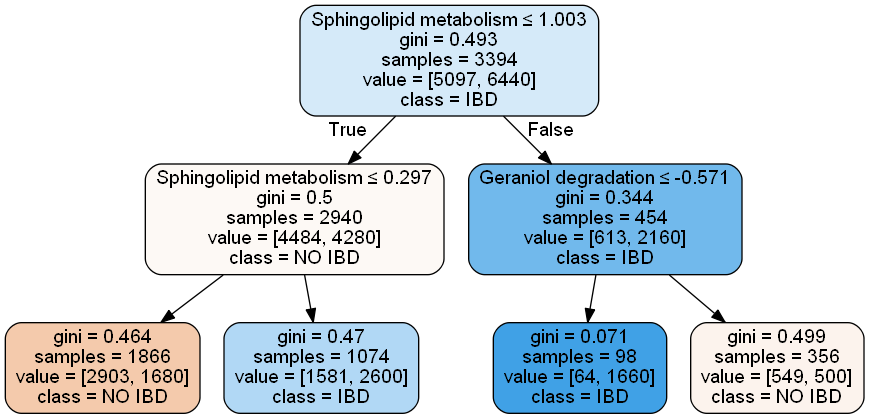

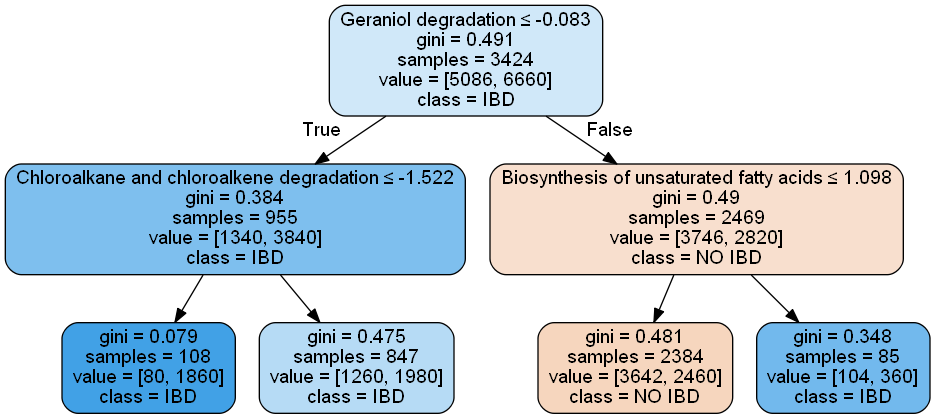

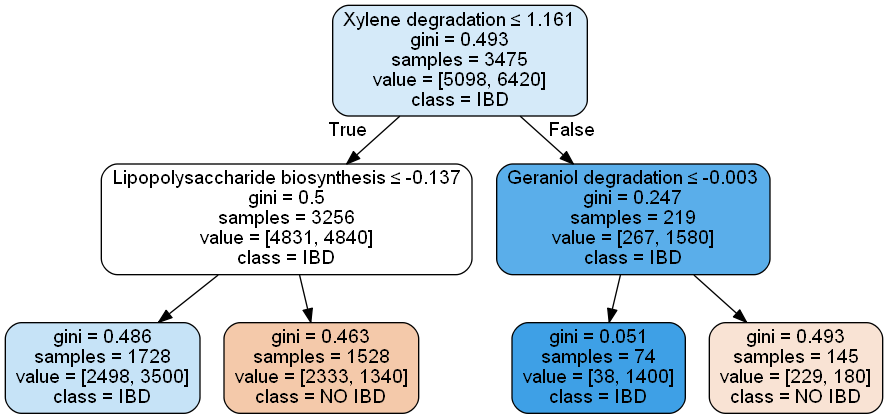

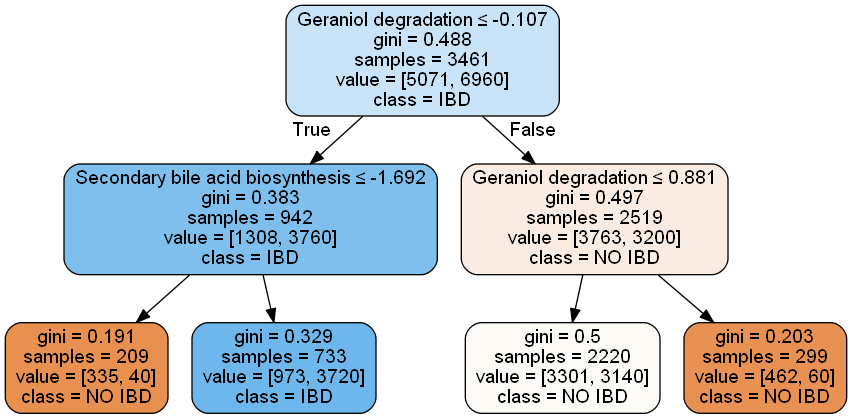

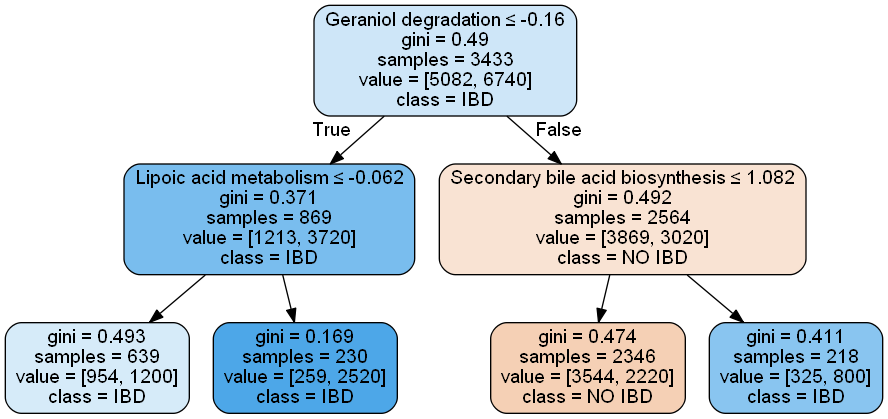

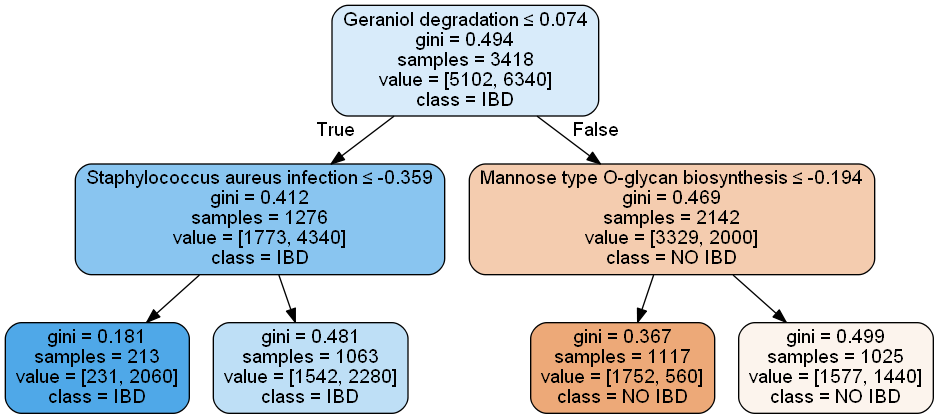

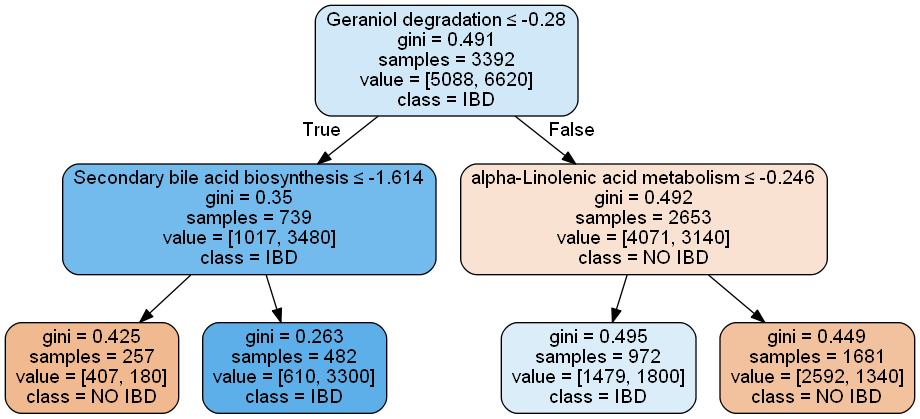

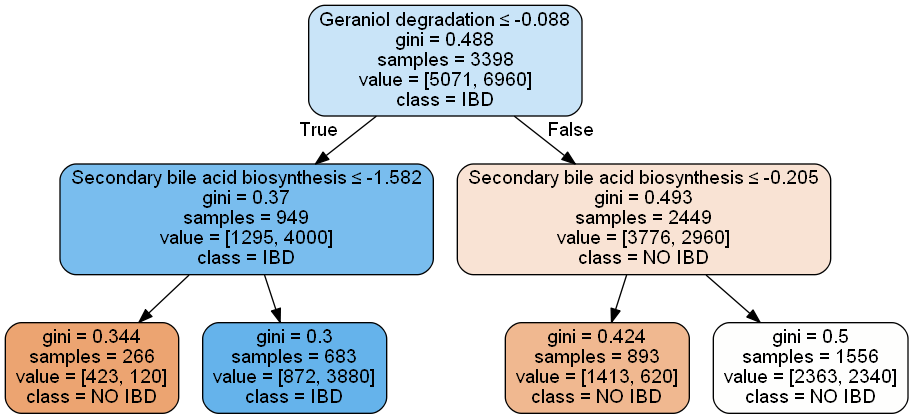

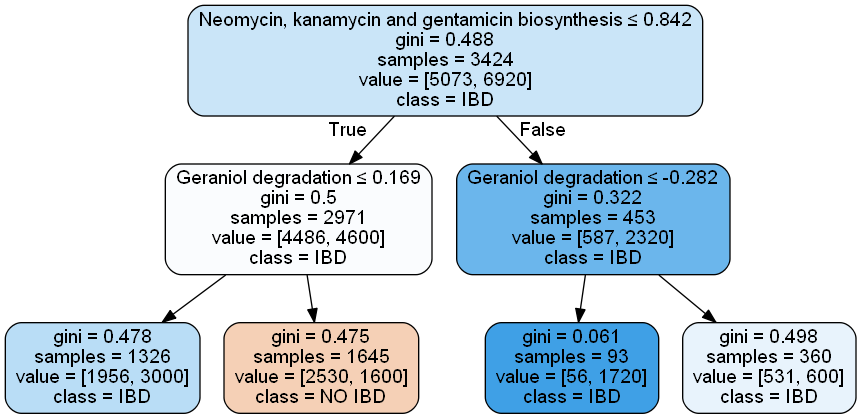

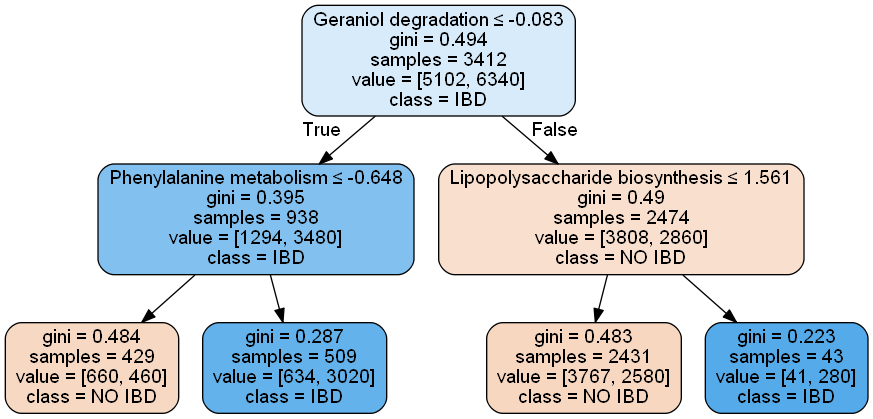

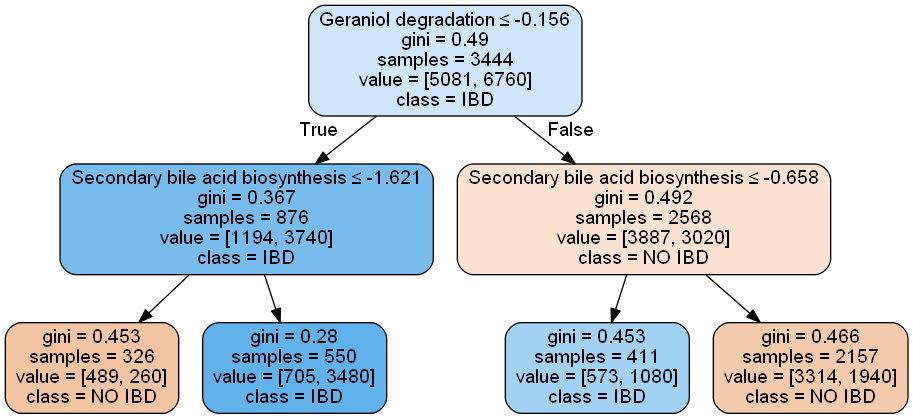

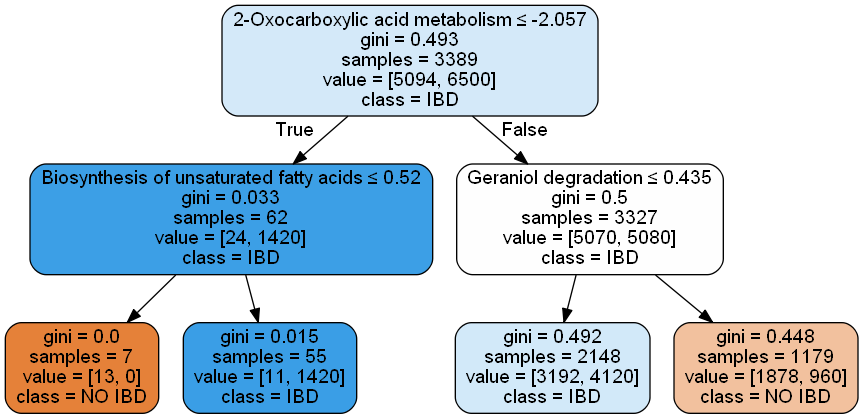

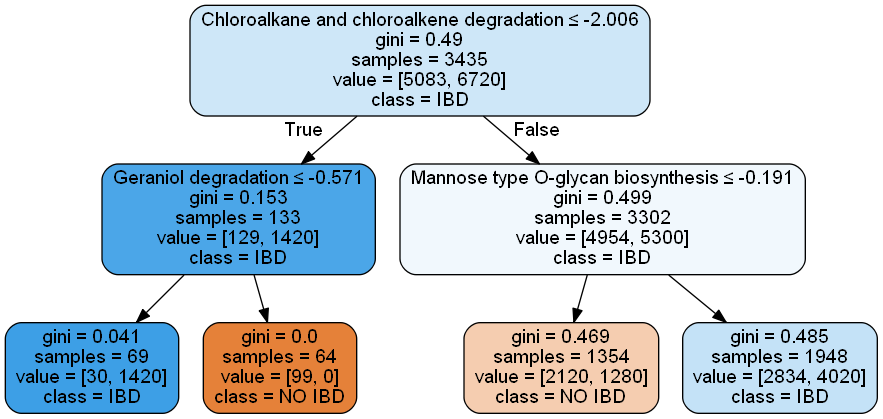

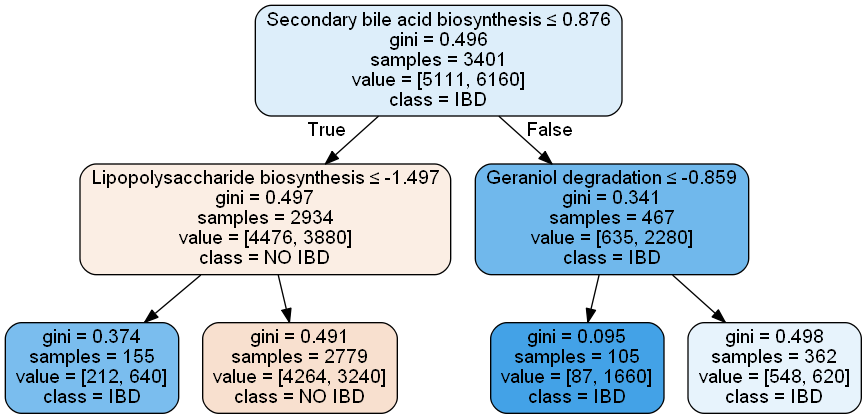

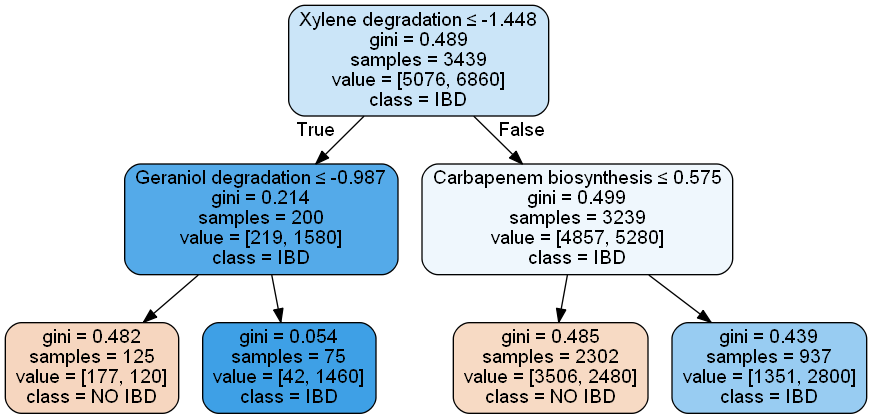

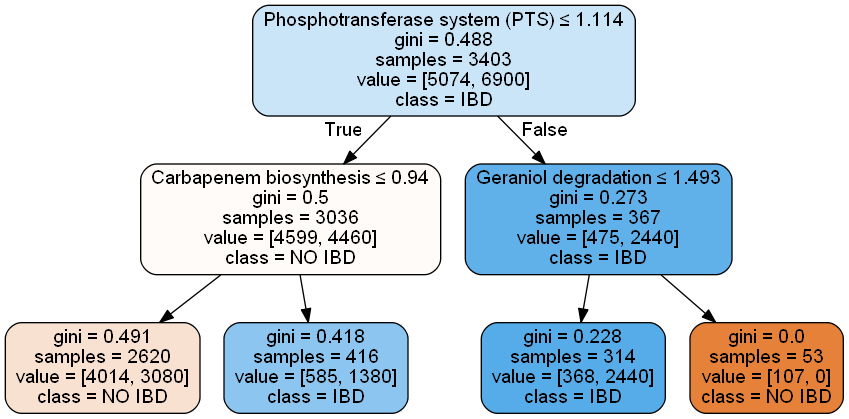

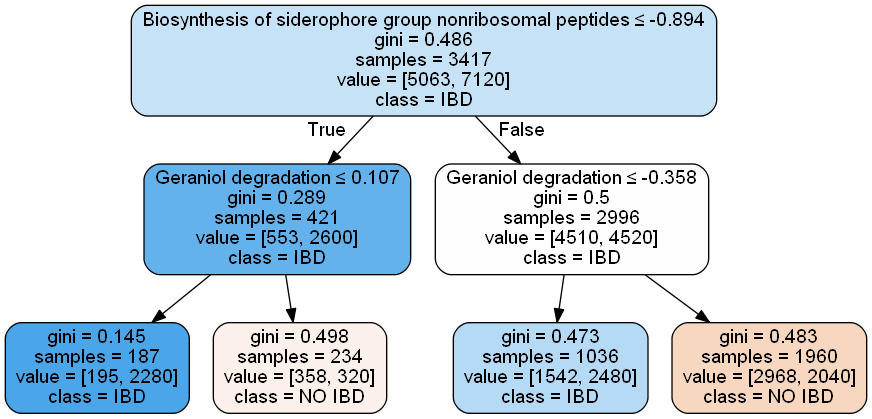

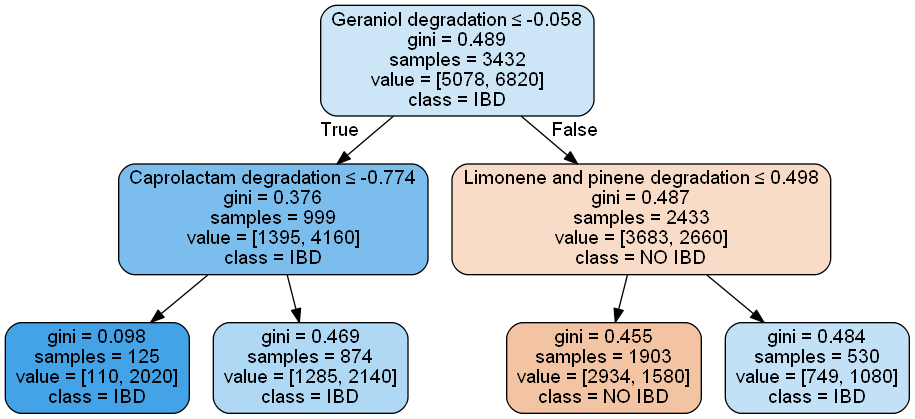

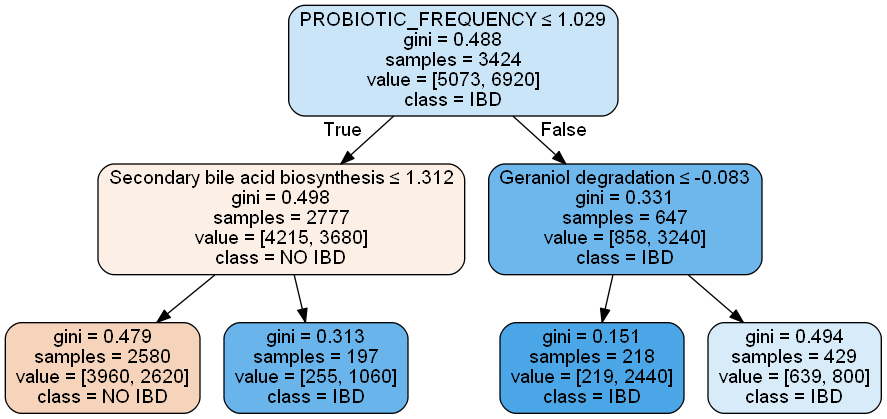

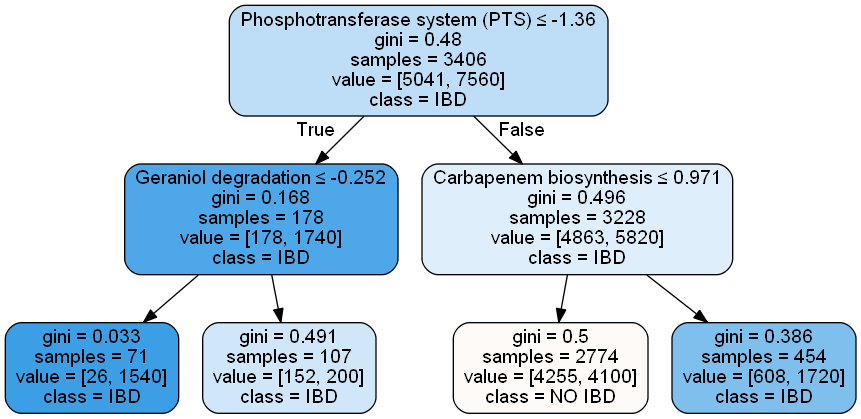

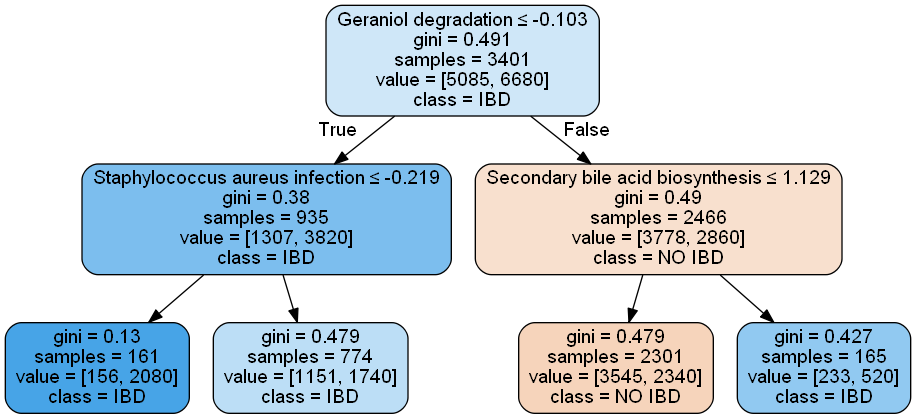

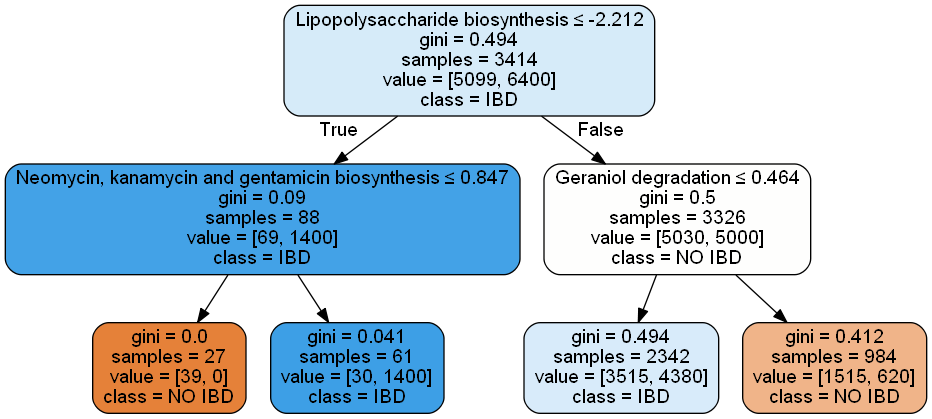

In [112]:
from treeinterpreter import treeinterpreter as ti

instances = X_test
prediction, bias, contributions = ti.predict(m, instances)

#Deduced that we want to look at the first column of the interpretations
prediction_use = prediction[:, 1]
bias_use = bias[:, 1]
contributions_use = contributions[:, :, 1]

In [130]:
inx = np.where(X_test.columns.values == "topic_86")
contributions_geraniol = np.squeeze(contributions_use[:, inx])
np.sum(contributions_geraniol > 0)


361

In [571]:
(len(y_train) - np.sum(y_train)) / np.sum(y_train) #Ratio of nonibd:ibd in training set - decided the weight

350.0
7434.0
7784


21.24

In [937]:
#We want the topics that have positive coefficients WHEN THE SAMPLE WAS ACTUALLY POSITIVE
ibd_samples = [i == 1 for i in y_test]
nonibd_samples = [i == 0 for i in y_test]
contributions_use[ibd_samples,0] #In some samples topics 0 contributed to a positive score, in some it contributed to a negative score. 

perc_pos_list = []
perc_neg_list = []
for topic in range(contributions_use.shape[1]): #for each topic
    perc_pos = np.sum(contributions_use[ibd_samples, topic] > 0) / np.sum(ibd_samples) #in the samples that were positive, how often did topic i get implicated as positive
    perc_pos_list.append(perc_pos)
    
    perc_neg = np.sum(contributions_use[nonibd_samples, topic]  < 0) / np.sum(nonibd_samples)
    perc_neg_list.append(perc_neg)
    
print(np.sum(np.array(perc_pos_list) > 0.8)) # 4 topics that positively contribute to IBD more than 70 % of the time
print(np.sum(np.array(perc_neg_list) > 0.90))
#Most of them are not positive all the time. So we need a way of figuring out when they are positive? What other variables are at play?
#The presence of other topics?
#Some phenotypic information?
perc_pos_list
perc_neg_list
consistent_pos_topics = np.array(perc_pos_list) > 0.7
consistent_neg_topics = np.array(perc_neg_list) > 0.9

4
19


In [949]:
keep_pos = np.array(perc_pos_list) > 0.8
consistent_pos_topics = X_test.columns.values[keep_pos]
consistent_pos_topics

keep_neg = np.array(perc_neg_list) > 0.95
consistent_neg_topics = X_test.columns.values[keep_neg]
consistent_neg_topics

array(['topic_47', 'topic_96', 'topic_154', 'topic_161', 'topic_204',
       'topic_235'], dtype=object)

In [954]:
qual_vecs_pos = qual_vecs.loc[:, consistent_pos_topics]
qual_vecs_neg = qual_vecs.loc[:, consistent_neg_topics]
qual_vecs_neg

topic_47  topic_96  topic_154  topic_161  topic_204  topic_235
0                                                                      
1000113 -0.245098 -0.227338  -0.463291  -0.240749  -0.123604   0.172471
1000269  0.074240  0.205478  -0.576746  -0.117811  -0.103398  -0.360665
1000512 -0.012795  0.229116  -0.241260   0.129507   0.311146   0.477588
1000986  0.172504  0.319715   0.216635   0.151802   0.037262   0.145176
1001007  0.136494 -0.167829  -0.060876   0.485520  -0.097311   0.189939
1001564 -0.139161 -0.637424  -0.312675   0.471665  -0.131335  -0.117935
1001908 -0.227846  0.191582  -0.272406   0.200011   0.376166   0.190244
1004326  0.176183 -0.384389   0.244001  -0.052698   0.448956  -0.050758
100457  -0.188600 -0.521293  -0.031449   0.644875   0.148534  -0.448105
1004910 -0.200761 -0.204924   0.260568   0.023295  -0.461071   0.172079
1005952 -0.357826  0.392634  -0.082839  -0.105577  -0.371941  -0.030035
1007430  0.211243 -0.317424   0.372482  -0.480436  -0.167623  -0.326257
1007750  0.518062  0.265846  -0.428687  -0.319427   0.014878  -0.396638
1007926  0.331390 -0.063323   0.274240  -0.052193  -0.095421   0.387406
1008348  0.140119  0.681484   0.421691  -0.119228  -0.489183  -0.185335
10085    0.361366  0.029322  -0.055443   0.159182   0.618047  -0.151286
1009362  0.103713 -0.001400  -0.281931   0.030590   0.000885  -0.310331
1010721 -0.029018  0.321987   0.025568   0.053512  -0.437447  -0.005949
1010876  0.281862 -0.131155   0.342417   0.243254   0.036627   0.156714
1011380  0.241116  0.203848   0.031087   0.021725   0.615562   0.351783
1011712  0.870760  0.309214  -0.079851   0.404265   0.169457  -0.183319
1012358 -0.039246  0.013169   0.338756  -0.357464  -0.249412   0.195145
101277   0.228969  0.242136  -0.530604  -0.004427   0.054949   0.072932
101293  -0.355859 -0.075139  -0.012681  -0.107154  -0.530934  -0.427831
1013285 -0.088697  0.451971   0.155295  -0.458971   0.129017  -0.219918
1013316  0.383446  0.161415   0.194686  -0.142490  -0.201603   0.097748
101542  -0.100446 -0.326930  -0.316153   0.220186   0.705135   0.163523
1015518 -0.312570  0.485570  -0.163795  -0.153277  -0.041843   0.422264
1015969  0.382842 -0.081236  -0.260141   0.037027  -0.111038  -0.468335
1016369  0.245745 -0.583353  -0.423457   0.209241   0.068862   0.053606
...           ...       ...        ...        ...        ...        ...
984924  -0.090509 -0.044810   0.360411  -0.499475   0.116521  -0.074056
98542    0.585388 -0.695875   0.229432   0.043499   0.360990  -0.368052
986708  -0.176493  0.040430   0.258074  -0.358366  -0.541963  -0.070931
9868    -0.082715 -0.345592  -0.435139  -0.072961  -0.218575  -0.159487
9870    -0.070754 -0.508773  -0.396711   0.194637  -0.257855  -0.062867
989234   0.454872  0.115267   0.038565   0.135593  -0.250399   0.005844
98939    0.314155 -0.344563  -0.044652   0.014945  -0.015061  -0.225233
989990  -0.236425  0.071607  -0.448345   0.296989  -0.190579   0.389154
992035   0.784121 -0.232972  -0.319541   0.137597  -0.432523  -0.038094
99242   -0.334882  0.331780   0.503224  -0.213244  -0.054839  -0.039376
99322    0.213904  0.209990   0.027902   0.379199   0.019451   0.584337
99331   -0.311453 -0.078693  -0.489027   0.543104  -0.040019   0.694308
993647   0.019262  0.233540  -0.147070  -0.179543  -0.253459  -0.022875
9939     0.001113 -0.169937  -0.176771   0.383944  -0.199289   0.095166
993934  -0.350285  0.191906   0.578296   0.018322   0.120676   0.237025
994257   0.514439 -0.202194   0.052592   0.243378  -0.038703   0.226585
994357   0.194793  0.233213  -0.033283  -0.190341   0.219377   0.155937
99531    0.290128 -0.378459  -0.027061  -0.055280  -0.057363   0.586503
99566    0.130274 -0.148620   0.112076  -0.558835  -0.235941  -0.075335
995900   0.033910 -0.126640   0.649870   0.059976  -0.218523   0.188848
996068   0.080348  0.046602  -0.203815   0.032315  -0.289828  -0.205123
996126   0.458612 -0.182471   0.493801   0.180377   0.254699   0.265626
996487  -0.038876 -0.105113   0.128463   0.139500

We can effectively get our dimensionality down to 10 while losing minimal accuracy in prediction power

Which taxa most contribute to those important topics?

In [5]:
#Arrange the rows so that the same taxa are together, then color the bars the color of the taxonomy
tax_table = pd.read_table("C:/Users/ctata/Documents/Lab/quality_vectors/data/greengenes/gg_13_8_otus/taxonomy/97_otu_taxonomy.txt",
                         index_col = 0, delimiter = ';|\t', header = None)
tax_table.index = tax_table.index.map(str)
keep = [i in qual_vecs.index.values for i in tax_table.index.values]
tax_table = tax_table.loc[keep, :]
tax_table = tax_table.reindex(sorted(tax_table.index.values))

c:\users\ctata\miniconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [618]:
print(getUnique(tax_table.iloc[:,5]))
[" g__Prevotella", " g__Desulfovibrio", " g__Bacteroides", " g__Butyricimonas", ' g__Lactobacillus', ' g__Clostridium',
' g__Turicibacter', ' g__Roseburia', ' g__Oscillospira', ' g__Sarcina', ' g__Ruminococcus', ' g__Dorea', ' g__Dialister', 
 ' g__Lachnospira', ' g__Enterobacter', ' g__Faecalibacterium', ' g__Akkermansia', ' g__Methylobacterium']

[' g__Methanobrevibacter', ' g__Parabacteroides', ' g__Prevotella', ' g__', ' g__Oxalobacter', ' g__Stenotrophomonas', ' g__Pantoea', ' g__Erwinia', ' g__Citrobacter', ' g__Aquamonas', ' g__Desulfovibrio', ' g__Pseudoclavibacter', ' g__Actinomyces', ' g__Actinobaculum', ' g__Mycobacterium', ' g__Corynebacterium', ' g__Mitsuokella', ' g__[Ruminococcus]', ' g__Peptoniphilus', ' g__Anaerococcus', ' g__Lactobacillus', ' g__Holdemania', ' g__Ruminococcus', ' g__Aerococcus', ' g__Dorea', ' g__Acidaminococcus', ' g__Clostridium', ' g__Bifidobacterium', ' g__Blautia', ' g__Tetragenococcus', ' g__Bacillus', ' g__Sneathia', ' g__Serratia', ' g__Leptotrichia', ' g__Anaerostipes', ' g__Paenibacillus', ' g__Sutterella', ' g__Lactococcus', ' g__Oscillospira', ' g__Bulleidia', ' g__Streptococcus', ' g__Dialister', ' g__Pseudomonas', ' g__Moryella', ' g__Solibacillus', ' g__Enterococcus', ' g__Achromobacter', ' g__Oligella', ' g__Actinobacillus', ' g__Comamonas', ' g__Brevibacterium', ' g__Dechloromon

(' g__Prevotella', ' g__Desulfovibrio', ' g__Bacteroides', ' g__Butyricimonas')

In [636]:
def plotHighMag(values):
    values[np.abs(values) < 0] = 0
    return(values)


In [626]:
def plotTopicTaxanomicMakeup(qual_vecs_obj, tax_table):
    #Sort taxa in qual_vecs by their family designation, for visualization purposes
    #Note the column order has not changed
    zipped = zip(qual_vecs_obj.index.values, tax_table.iloc[:, 5])
    sorted_zipped = sorted(zipped, key = lambda t: t[1], reverse = False)

    #Major players: 
    #major_players = [' f__Bacteroidaceae', ' f__Bifidobacteriaceae', ' f__Clostridiaceae', ' f__Desulfovibrionaceae',  ' f__Lachnospiraceae', 
    #' f__Turicibacteraceae', ' f__Vibrionaceae']
    major_players = [" g__Prevotella", " g__Desulfovibrio", " g__Bacteroides", " g__Butyricimonas", ' g__Lactobacillus', ' g__Clostridium',
' g__Turicibacter', ' g__Roseburia', ' g__Oscillospira', ' g__Sarcina']
    sorted_zipped = [i for i in sorted_zipped if i[1] in major_players]

    qual_vec_ids_ordered = [i[0] for i in sorted_zipped]
    taxa_name_ordered = [i[1] for i in sorted_zipped]
    qual_vecs_ordered = qual_vecs_obj.reindex(qual_vec_ids_ordered)
    
    from matplotlib import cm
    def getUniques(l):
        uniques = []
        for i in l:
            if i not in uniques:
                uniques.append(i)
        return(uniques)

    cmap = plt.cm.get_cmap("Set1")  # define the colormap
    # extract all colors from the .jet map
    unique_taxa = getUniques(taxa_name_ordered)
    numColors = len(unique_taxa)
    cmaplist = [cmap(i) for i in range(numColors)]
    color_dict = dict((key, value) for (key,value) in zip(unique_taxa, cmaplist))
    
    
    #Functional guild profiles
    plt.figure(figsize=(20,15))
    for i in range(qual_vecs_ordered.shape[1]):
        plt.subplot(4, 3, i+1)
        plt.bar(range(qual_vecs_ordered.shape[0]), qual_vecs_ordered.iloc[:,i], color = [color_dict[i] for i in taxa_name_ordered])

    markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_dict.values()]
    plt.subplot(4, 3, qual_vecs_ordered.shape[1]+1)
    plt.legend(markers, color_dict.keys(), numpoints=1)

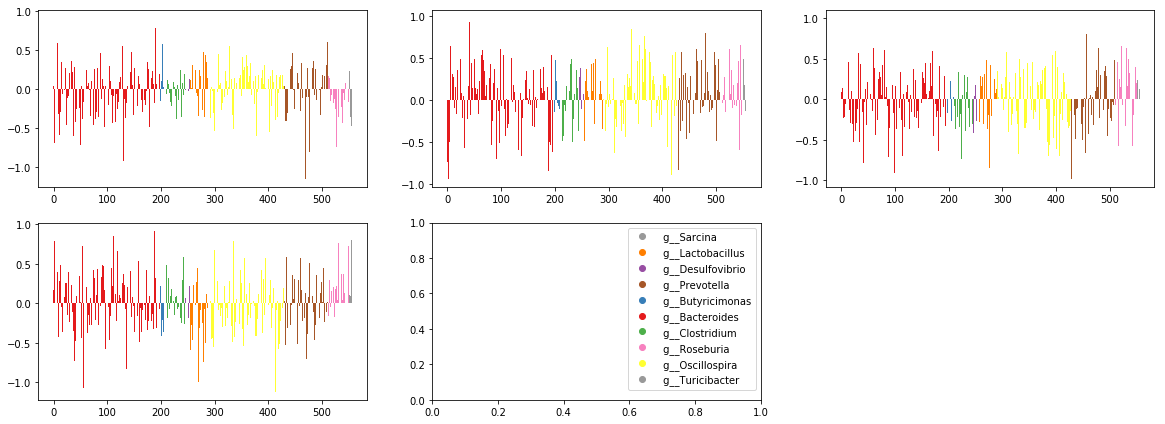

In [955]:
plotTopicTaxanomicMakeup(qual_vecs_pos, tax_table)

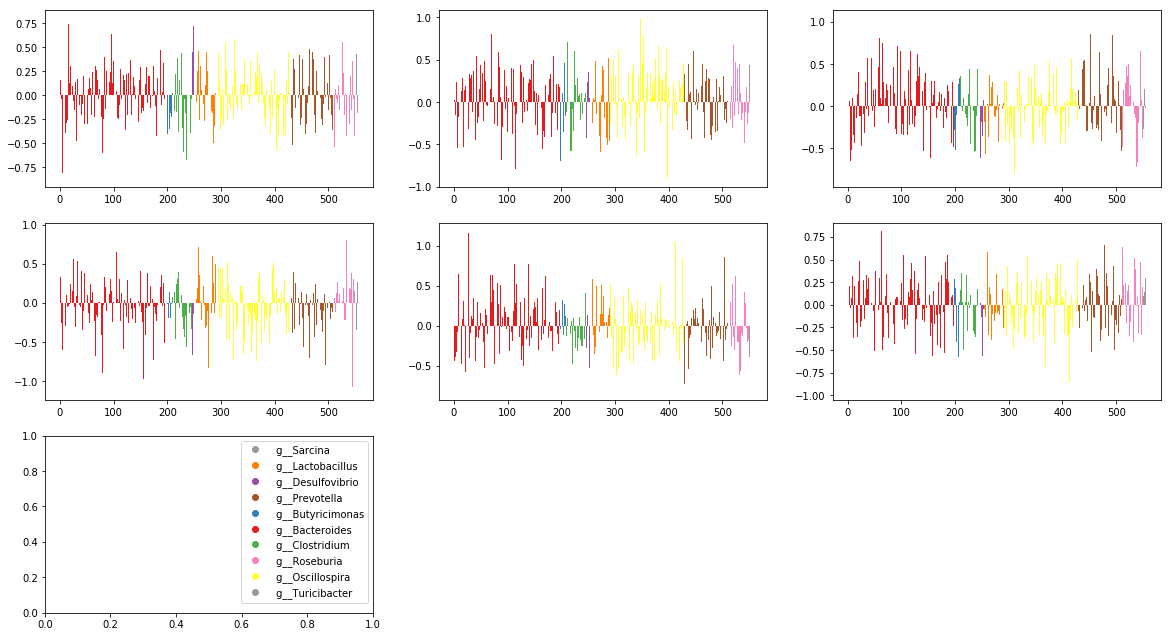

In [956]:
plotTopicTaxanomicMakeup(qual_vecs_neg, tax_table)

## t-SNE of embeddings colored by taxa

In [215]:
#Arrange the rows so that the same taxa are together, then color the bars the color of the taxonomy
tax_table = pd.read_table("C:/Users/ctata/Documents/Lab/quality_vectors/data/greengenes/gg_13_8_otus/taxonomy/97_otu_taxonomy.txt",
                         index_col = 0, delimiter = ';|\t', header = None)
tax_table.index = tax_table.index.map(str)
keep = [i in qual_vecs.index.values for i in tax_table.index.values]
tax_table = tax_table.loc[keep, :]
tax_table = tax_table.reindex(sorted(tax_table.index.values))

C:\Users\ctata\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [217]:
from sklearn.manifold import TSNE
tax_table.columns = ["Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species"]
tmp = qual_vecs.loc[tax_table["Family"] == " f__Clostridiaceae", :]
tmp.shape


(206, 250)

In [218]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(tmp)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 206 samples in 0.000s...
[t-SNE] Computed neighbors for 206 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 206 / 206
[t-SNE] Mean sigma: 2.819692
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.027287
[t-SNE] KL divergence after 300 iterations: 0.304229


In [219]:
tax_tmp = tax_table.loc[tmp.index.values, :]

tax_tmp["tsne1"] = tsne_results[:,0]
tax_tmp["tsne2"] = tsne_results[:,1]
tax_tmp

Kingdom          Phylum           Class              Order  \
0                                                                         
1106362  k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
1115481  k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
1127530  k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
13760    k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
1625448  k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
1646171  k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
167646   k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
173921   k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
174174   k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
174497   k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
174516   k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
177228   k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
178183   k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
178364   k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
178640   k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
1788776  k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
180552   k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
180876   k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
181466   k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
181467   k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
181849   k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
182643   k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
183783   k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
184009   k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
1846390  k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
185222   k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
186389   k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
186411   k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
187668   k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
189793   k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
...              ...             ...             ...                ...   
4459634  k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
4464717  k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
4465124  k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
4468465  k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
4478840  k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
4481624  k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
4482516  k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
508984   k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
524842   k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
557627   k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
558387   k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
575768   k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
578908   k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
585869   k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
622303   k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
631218   k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
69664    k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
708285   k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
73000    k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
743082   k__Bacteria   p__Firmicutes   c__Clostridia   o__Clostridiales   
74480    k__Bacteria   p__Firmicutes  

In [220]:
def getUniques(l):
        uniques = []
        for i in l:
            if i not in uniques:
                uniques.append(i)
        return(uniques)



6

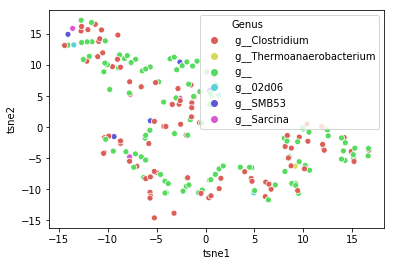

In [224]:
import seaborn as sns
tax_table
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="Genus",
    palette=sns.color_palette("hls", len(getUniques(tax_tmp["Genus"]))),
    data=tax_tmp,
    legend="full"
)

In [192]:

tax_table.columns = ["Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species"]
pca = PCA(n_components= 2)
pca = pca.fit(qual_vecs)
table_pca = pca.transform(qual_vecs)
tax_table['pca1'] = table_pca[:, 0]
tax_table['pca2'] = table_pca[:,1]
len(getUniques(tax_table["Phylum"]))

22

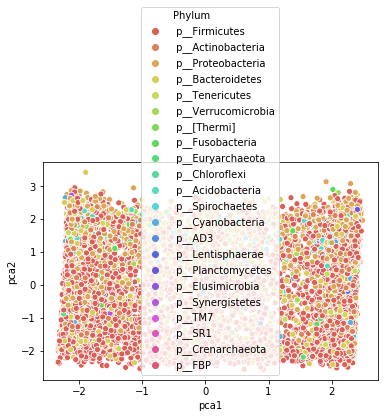

In [194]:
from sklearn.decomposition import PCA

sns.scatterplot(
    x="pca1", y="pca2",
    hue="Phylum",
    palette=sns.color_palette("hls", 22),
    data=tax_table,
    legend="full"
)


## Remove projection onto first principle component

In [230]:
pca = PCA(n_components= 1)
pca = pca.fit(qual_vecs)
table_pca = pca.transform(qual_vecs)
table_pca.shape

(7731, 1)

In [237]:
qual_vecs.iloc[1,:] - table_pca[1]

topic_1      0.582207
topic_2      0.590309
topic_3      0.511498
topic_4      0.689130
topic_5      0.474269
topic_6     -0.077339
topic_7      0.187768
topic_8      0.297504
topic_9      0.807079
topic_10     0.447825
topic_11     0.498040
topic_12     0.656715
topic_13     0.559996
topic_14     1.128146
topic_15     0.327097
topic_16     0.309239
topic_17     0.372012
topic_18    -0.072195
topic_19     0.415231
topic_20    -0.052185
topic_21     0.260160
topic_22     0.302045
topic_23     0.488221
topic_24    -0.228418
topic_25     0.743540
topic_26     0.211331
topic_27     0.085083
topic_28     0.034518
topic_29     0.946505
topic_30     0.531590
               ...   
topic_221    0.018578
topic_222    0.523988
topic_223    0.191697
topic_224    0.555930
topic_225    0.232565
topic_226    0.419670
topic_227    0.573324
topic_228   -0.018037
topic_229    0.243346
topic_230    0.770107
topic_231    0.092995
topic_232    0.314461
topic_233    0.148381
topic_234    0.444476
topic_235 

In [238]:
qual_vecs_denoise = qual_vecs.subtract(np.squeeze(table_pca), axis = 0)

## INTERPRETATION - PERMANOVA AND CCA


In [6]:
#Group taxa by family, and see if there are any dimensions that are significantly different across family lines
from skbio.stats.distance import permanova
from skbio.stats.distance import DistanceMatrix as dm

#distance matrix
dot_product = qual_vecs.dot(qual_vecs.transpose())
mags = np.sqrt(np.square(qual_vecs).sum(axis=1))
tmp = dot_product.div(mags, axis = 0)
cosine_sim = tmp.div(mags, axis = 1)
cosine_dist = 1 - cosine_sim

In [9]:
cosine_dist = np.round(cosine_dist.values, decimals = 7)

In [25]:
otu_train.shape

(5419, 7731)

In [18]:
dist_mat = dm(cosine_dist)

In [19]:
grouping = tax_table.iloc[:, 3]
permutations = 100
perm = permanova(distance_matrix = dist_mat, grouping = grouping, permutations = permutations)

In [20]:
#Distance in embedding space can be explained (significantly) by phylogenetic classification (order)
#IE if you assigned order classification randomly, you would not see the separation in distances that you do see
perm

method name                PERMANOVA
test statistic name         pseudo-F
sample size                     7731
number of groups                 103
test statistic               9.11846
p-value                   0.00990099
number of permutations           100
Name: PERMANOVA results, dtype: object

#MINIMAL TAXONOMY PREDICTION - DELETE EVERYONE BUT THE MAIN PLAYERS FROM QUALITY VECTOR MATRIX, THEN EMBED AND PREDICT AGAIN

In [666]:
qual_vecs_obj = qual_vecs
zipped = zip(qual_vecs_obj.index.values, tax_table.iloc[:, 5])
sorted_zipped = sorted(zipped, key = lambda t: t[1], reverse = False)
major_players = [" g__Prevotella", " g__Desulfovibrio", " g__Bacteroides", " g__Butyricimonas", ' g__Lactobacillus', ' g__Clostridium',
' g__Turicibacter', ' g__Roseburia', ' g__Oscillospira', ' g__Sarcina', ' g__Ruminococcus', ' g__Dorea', ' g__Dialister', 
 ' g__Lachnospira', ' g__Enterobacter', ' g__Faecalibacterium', ' g__Akkermansia', ' g__Methylobacterium']
sorted_zipped = [i for i in sorted_zipped if i[1] in major_players]
sorted_zipped
keep = [i[0] for i in sorted_zipped]
qual_vecs_taxReduced = qual_vecs.loc[keep, ]



In [669]:
qual_vecs_taxReduced.shape

(844, 250)

0.7270389501605472


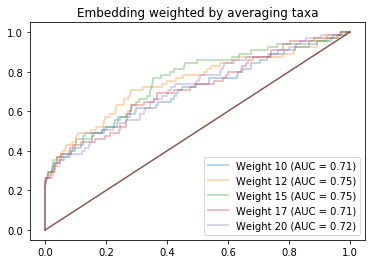

In [668]:
importlib.reload(hf)
#Set random seed
aucs
nf = 50

X_train = preprocessing.scale(embed_average(otu_train, qual_vecs_taxReduced))
X_test = preprocessing.scale(embed_average(otu_test, qual_vecs_taxReduced))

auc_list = hf.predictIBD(X_train, y_train, X_test, y_test, "Embedding weighted by averaging taxa")
print(np.mean(auc_list))
#We lose about ~5% accuracy by only including the "major players" in the gut
#Interesting thought: we could cycle through each taxonomic group, and see if any of them lose information much more than others

Go back and attribute importance to individual taxa by weighting by the importance in the rf: (feat_imp_sort) and the contributions of each taxa to that topic: (qual_vecs_pos)

In [478]:
topic_ids = [i[0] for i in feat_imp_sort]
imp_scores = [i[1] for i in feat_imp_sort]
qual_vecs_pos
keep = [topic_ids.index(i) for i in qual_vecs_pos.columns.values]
print(keep)
print(qual_vecs_pos.columns.values)
imp_scores_pos = np.array(imp_scores)[keep]

qual_vecs_pos_weighted = qual_vecs_pos.mul(imp_scores_pos, axis = 1) #These taxa are positively contributing to IBD, 
taxa_imp_scores = qual_vecs_pos_weighted.sum(axis = 1)
np.sum(taxa_imp_scores > 0) / len(taxa_imp_scores) #30% of the taxa are positively contributing to IBD, in the right context

[206, 51, 9, 177, 181, 239, 220, 8]
[188 155  26  48 231  63 183  86]


0.293701171875

USE THE EMBEDDINGS ON AUTISM DATA


### Can we improve prediction at all by using biofiltered features?

### Repeat the above tests predicting gluten intolerance

In [11]:
map_train, map_test, y_train, y_test = setTarget(map_train_save, map_test_save, target = "GLUTEN")

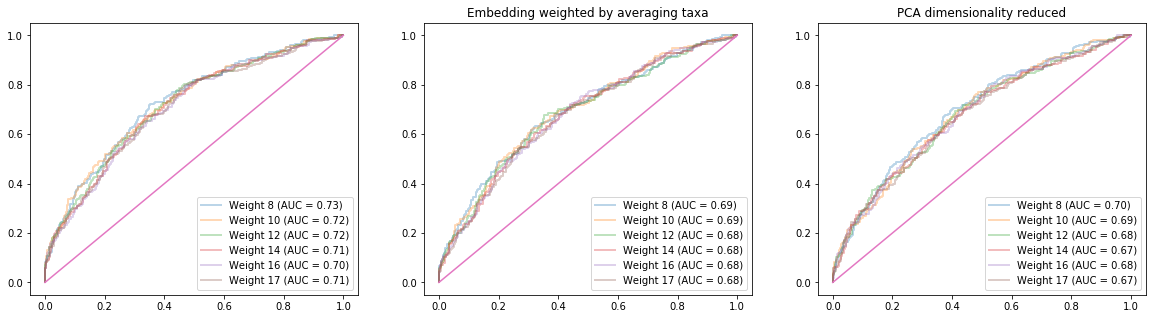

In [13]:
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)

#Normal
X_train = preprocessing.scale(hf.asinh(otu_train))
X_test = preprocessing.scale(hf.asinh(otu_test))
hf.predictIBD(X_train, y_train, X_test, y_test)

plt.subplot(1, 3, 2)
#Embed Average
X_train = preprocessing.scale(embed_average(otu_train, qual_vecs))
X_test = preprocessing.scale(embed_average(otu_test, qual_vecs))
hf.predictIBD(X_train, y_train, X_test, y_test, "Embedding weighted by averaging taxa")

plt.subplot(1, 3, 3)
#PCA
X_train, X_test = hf.getPCAReduced(X_train, X_test, components = 250)
hf.predictIBD(preprocessing.scale(X_train), y_train, preprocessing.scale(X_test), y_test, "PCA dimensionality reduced")

#### Problems: 
##### - Embeddings are very sensitive to sequencing depth (which dictates which taxa are "present" in any given environment)
##### - Challenge to interpret, even though they may be very meaningful
##### - Not sure how to integrate a dimension of time

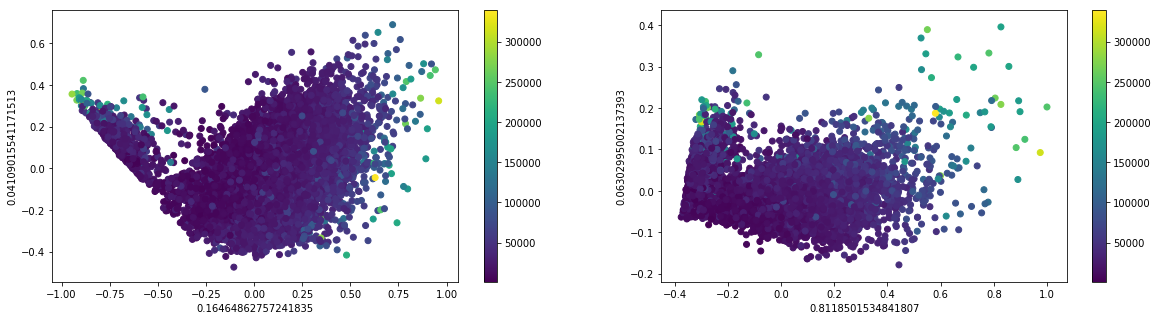

In [11]:
importlib.reload(hf)
plt.figure(figsize=(20,5))

otu_use = otu_train
sample_sums_table = otu_use.sum(axis = 1)
otu_use = otu_use.loc[sample_sums_table < 400000]

plt.subplot(1, 2, 1)
hf.plotPCA(hf.asinh(otu_use), otu_raw = otu_use, components = 250)
plt.subplot(1, 2, 2)
hf.plotPCA(embed_average(otu_use, qual_vecs), otu_raw = otu_use, components = 250)
